# Call for Code: Wildfires Australia

### Challenge

Ultimate goal of the challenge is to <b>predict the area of wildfires in 7 regions in Australia for February 2021</b> with the help of historical data, so you will be predicting fires before they have happened!

### Data

You can download the historic data from:
https://github.com/Call-for-Code/Spot-Challenge-Wildfires/tree/main/data

The following data is provided in CSV format as daily timeseries:

    Historical wildfires
    Historical weather
    Historical weather forecasts
    Historical vegetation index
    Land classes (static throughout the contest)


Let start with each one of them and then we will merge data as required.

In [1]:
import wget
import zipfile

proceed = False
if proceed:
    wget.download('https://raw.githubusercontent.com/Call-for-Code/Spot-Challenge-Wildfires/main/data/Nov_10.zip', 'Nov_10.zip')


    zip_handle = zipfile.ZipFile("Nov_10.zip")
    zip_handle.extractall()

### Historial Wildfires

There is detailed <b>readme</b> along with the CSV file which contains all the information pertaining to Historical Wildfire data.

* `Region`: the 7 regions
* `Date`: in UTC and provide the data for 24 hours ahead
* `Estimated_fire_area`: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km$^2$
* `Mean_estimated_fire_brightness`: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
* `Mean_estimated_fire_radiative_power`: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
* `Mean_confidence`: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
* `Std_confidence`: standard deviation of estimated fire radiative power in megawatts
* `Var_confidence`: Variance of estimated fire radiative power in megawatts
* `Count`: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
* `Replaced`: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


Let's load its file "Historical_Wildfires.csv" with the help of Python and play with it.

In [2]:
import pandas as pd
import numpy as np

In [3]:
file_wildfires = "Nov_10\Historical_Wildfires.csv"
print("Reading file: '{}'".format(file_wildfires))
df = pd.read_csv(file_wildfires)
print("Loaded...")

df.head()

Reading file: 'Nov_10\Historical_Wildfires.csv'
Loaded...


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
num_rows, num_cols = df.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df.columns)))

There are total 26406 records in the following 10 columns:

Region
Date
Estimated_fire_area
Mean_estimated_fire_brightness
Mean_estimated_fire_radiative_power
Mean_confidence
Std_confidence
Var_confidence
Count
Replaced


In [5]:
# Checking data types of each columns
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Converting <b>Date</b> column to date type

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print("Minimum Date: {}".format(df['Date'].min()))
print("Maximum Date: {}".format(df['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2020-10-31 00:00:00


Let's check if there are any <b>NULL</b> values in this data.

In [7]:
df.isna().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2207
Var_confidence                         2207
Count                                     0
Replaced                                  0
dtype: int64

Now, we will check the reason for above null values

In [8]:
df.loc[df.Std_confidence.isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26327,WA,2020-08-09,2.34,300.15,30.2,85.0,NaN,NaN,1,N
26331,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26332,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26335,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N


In [9]:
df.loc[df.Var_confidence.isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26327,WA,2020-08-09,2.34,300.15,30.2,85.0,NaN,NaN,1,N
26331,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26332,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26335,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N


Let's cross check distinct <b>Count</b> values when <b>Std_confidence</b> and <b>Var_confidence</b> are <b>NULL</b>.

In [10]:
df.loc[(df['Std_confidence'].isna()) & (df['Var_confidence'].isna()), ['Count']].drop_duplicates().reset_index(drop=True)

,Count
0,1


<b>OR

In [11]:
# distinct "Count" column values when Std_confidence and Var_confidence are NULL.
print("Distinct 'Count' column values when Std_confidence and Var_confidence are NULL.\n")
Count_values = df.loc[(df['Std_confidence'].isna()) & (df['Var_confidence'].isna()), 'Count'].values
print("'Count' Column Values: {}".format(Count_values))

import numpy as np
print("'Count' Column Unique Values: {}".format(np.unique(Count_values)))

Distinct 'Count' column values when Std_confidence and Var_confidence are NULL.

'Count' Column Values: [1 1 1 ... 1 1 1]
'Count' Column Unique Values: [1]


As we can see that <b>Standard Deviation</b> and <b>Variance</b> Confidence values are null because <b>Count</b> equals 1. <b>Count</b> of 1 shows that there was 1 pixel representing other values. So, lets fill these <b>NULL</b> values with zero.

In [12]:
df.loc[df['Std_confidence'].isna(), 'Std_confidence'] = 0
df.loc[df['Var_confidence'].isna(), 'Var_confidence'] = 0

In [13]:
region = df['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions for Historical Wildfires:\n\n{}".format(num_regions, all_regions))

Following are 7 unique regions for Historical Wildfires:

NSW
NT
QL
SA
TA
VI
WA


Dropping duplicates in data and reseting the index and checking total records in data

In [14]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

# Reset dataframe index
df.reset_index(drop=True, inplace=True)

In [15]:
# Number of records
num_rows, num_cols = df.shape
print("Total Records:\t{}".format(num_rows))

Total Records:	26406


In [16]:
# First five rows in data
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [17]:
# Last five rows in data
df.tail()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
26401,WA,2020-10-27,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,2020-10-28,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N
26405,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N


### Historial Weather

There is a detailed <b>readme</b> along with the CSV file which contains all the information pertaining to Historical Weather data.

* All variables are aggregated to daily values from YYYY-mm-ddT01:00:00Z to YYYY-mm-(dd+1)T00:00:00Z
* `Precipitation` is derived from total precipitation. Hourly raw data is converted from m/hour to mm/hour
* `Relative humidity` is derived from the temperature and dewpoint
* `Soil Water Content` is given for 0 - 7 cm below the surface
* `Solar Radiation` or Surface Solar Radiation Downwards. Units are converted from J/h to MJ/h
* `Temperature`
* `Wind Speed` is calculated for every hour from the Easterly and Northerly 10 meter wind components

Let's load its file "HistoricalWeather.csv" with the help of Python and play with it.

In [18]:
file_weather = "Nov_10\HistoricalWeather.csv"
print("Reading file: '{}'".format(file_weather))
df_weather = pd.read_csv(file_weather)
print("Loaded...")

df_weather.head()

Reading file: 'Nov_10\HistoricalWeather.csv'
Loaded...


,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [19]:
num_rows, num_cols = df_weather.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_weather.columns)))

There are total 242781 records in the following 8 columns:

Date
Region
Parameter
count()[unit: km^2]
min()
max()
mean()
variance()


In [20]:
# Let rename columns names
df_weather.columns = ['Date', 'Region', 'Parameter', 'area', 'min', 'max', 'mean', '2nd_moment']
df_weather.head()

,Date,Region,Parameter,area,min,max,mean,2nd_moment
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [21]:
# Checking data types of each columns
df_weather.dtypes

Date           object
Region         object
Parameter      object
area          float64
min           float64
max           float64
mean          float64
2nd_moment    float64
dtype: object

In [22]:
# Converting "Date" column to date type
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
print("Minimum Date: {}".format(df_weather['Date'].min()))
print("Maximum Date: {}".format(df_weather['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2020-10-31 00:00:00


Let's check if there are any null or missing values in this data.

In [23]:
df_weather.isna().sum()

Date          0
Region        0
Parameter     0
area          0
min           0
max           0
mean          0
2nd_moment    0
dtype: int64

In [24]:
df_weather.head(5)

,Date,Region,Parameter,area,min,max,mean,2nd_moment
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


Let's rearrange data such that the "Parameter" Values become columns contains values 'area', 'min', 'max', 'mean' and '2nd_moment' while keeping distinct values for 'Date','Region' amd 'area'

In [25]:
df_pivot = df_weather.pivot_table(values=['min','max','mean','2nd_moment'], index=['Date','Region', 'area'], columns=['Parameter'])
df_pivot

2nd_moment                   \
Parameter                      Precipitation RelativeHumidity   
Date       Region area                                          
2005-01-01 NSW    8.002343e+05      0.028362       253.559937   
           NT     1.357561e+06    546.059262       584.201131   
           QL     1.730605e+06     35.641257       403.134377   
           SA     9.913151e+05      0.042837       246.044713   
           TA     6.778526e+04     12.068597       111.754034   
...                                      ...              ...   
2020-10-31 QL     1.730605e+06      4.229566       316.368911   
           SA     9.913151e+05      0.000492       316.308826   
           TA     6.778526e+04      0.243603        10.936866   
           VI     2.294532e+05      3.148454        44.766480   
           WA     2.528546e+06      2.097161       309.018764   

                                                                            \
Parameter                      SoilWaterContent SolarRadiation Temperature   
Date       Region area                                                       
2005-01-01 NSW    8.002343e+05         0.007758       6.078587   18.562212   
           NT     1.357561e+06         0.026743      58.942658   12.920252   
           QL     1.730605e+06         0.012679      29.500832   13.792599   
           SA     9.913151e+05         0.001917       7.914246   34.799336   
           TA     6.778526e+04         0.007121      12.826400    4.912013   
...                                         ...            ...         ...   
2020-10-31 QL     1.730605e+06         0.006935       4.796284    8.811943   
           SA     9.913151e+05         0.005425      17.093209    9.466862   
           TA     6.778526e+04         0.009317       8.718983    2.388990   
           VI     2.294532e+05         0.005050       9.917196    4.088503   
           WA     2.528546e+06         0.001419       5.986063   15.293953   

                                                   max                   \
Parameter                      WindSpeed Precipitation RelativeHumidity   
Date       Region area                                                    
2005-01-01 NSW    8.002343e+05  0.850048      1.836935        80.522964   
           NT     1.357561e+06  1.930014    315.266815        95.683342   
           QL     1.730605e+06  0.883048     74.452164        95.898270   
           SA     9.913151e+05  1.655908      3.193624        81.980751   
           TA     6.778526e+04  2.963118     13.604791        81.501442   
...                                  ...           ...              ...   
2020-10-31 QL     1.730605e+06  0.549077     26.366877        87.803581   
           SA     9.913151e+05  0.640926      0.259189        82.642616   
           TA     6.778526e+04  0.859296      2.179307        86.428932   
           VI     2.294532e+05  1.019079     11.436618        93.374763   
           WA     2.528546e+06  1.873607     15.154541        82.022224   

                                                                ...  \
Parameter                      SoilWaterContent SolarRadiation  ...   
Date       Region area                                          ...   
2005-01-01 NSW    8.002343e+05         0.414305      32.169781  ...   
           NT     1.357561e+06         0.496140      31.634459  ...   
           QL     1.730605e+06         0.472416      31.982830  ...   
           SA     9.913151e+05         0.263911      31.734528  ...   
           TA     6.778526e+04         0.368189      33.225517  ...   
...                                         ...            ...  ...   
2020-10-31 QL     1.730605e+06         0.442840      30.670065  ...   
           SA     9.913151e+05         0.436347      29.623133  ...   
           TA     6.778526e+04         0.376833      28.439209  ...   
           VI     2.294532e+05         0.455111      28.041906  ...   
           WA     2.528546e+06         0.285399      29.

In [26]:
# Reset dataframe index
df_pivot.reset_index(inplace=True)
df_pivot.head()

Date Region          area    2nd_moment                   \
Parameter                                 Precipitation RelativeHumidity   
0         2005-01-01    NSW  8.002343e+05      0.028362       253.559937   
1         2005-01-01     NT  1.357561e+06    546.059262       584.201131   
2         2005-01-01     QL  1.730605e+06     35.641257       403.134377   
3         2005-01-01     SA  9.913151e+05      0.042837       246.044713   
4         2005-01-01     TA  6.778526e+04     12.068597       111.754034   

                                                                          max  \
Parameter SoilWaterContent SolarRadiation Temperature WindSpeed Precipitation   
0                 0.007758       6.078587   18.562212  0.850048      1.836935   
1                 0.026743      58.942658   12.920252  1.930014    315.266815   
2                 0.012679      29.500832   13.792599  0.883048     74.452164   
3                 0.001917       7.914246   34.799336  1.655908      3.193624   
4                 0.007121      12.826400    4.912013  2.963118     13.604791   

           ...             mean                                       \
Parameter  ... SoilWaterContent SolarRadiation Temperature WindSpeed   
0          ...         0.170931      26.749389   27.341182  3.323550   
1          ...         0.167735      19.781791   29.881492  5.296892   
2          ...         0.185641      27.056979   28.842866  3.483753   
3          ...         0.056047      27.142643   30.793675  4.657538   
4          ...         0.211360      26.755711   11.788805  5.408138   

                    min                                                   \
Parameter Precipitation RelativeHumidity SoilWaterContent SolarRadiation   
0              0.000000        13.877194         0.002245      14.515009   
1              0.000000        14.558820         0.000000       2.518120   
2              0.000000        14.443199         0.000000       6.033827   
3              0.000000        10.618136         0.000000      17.861103   
4              0.003973        43.906574         0.000000      20.742302   

                                 
Parameter Temperature WindSpeed  
0           14.485785  1.354448  
1           24.179960  1.840394  
2           20.951620  1.106028  
3           14.095855  2.023657  
4            6.686816  1.995647  

[5 rows x 27 columns]

In [27]:
# Renaming Column names
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]
df_pivot.head()

,Date,Region,area,Precipitation_2nd_moment,RelativeHumidity_2nd_moment,SoilWaterContent_2nd_moment,SolarRadiation_2nd_moment,Temperature_2nd_moment,WindSpeed_2nd_moment,Precipitation_max,...,SoilWaterContent_mean,SolarRadiation_mean,Temperature_mean,WindSpeed_mean,Precipitation_min,RelativeHumidity_min,SoilWaterContent_min,SolarRadiation_min,Temperature_min,WindSpeed_min
0,2005-01-01,NSW,8.002343e+05,0.028362,253.559937,0.007758,6.078587,18.562212,0.850048,1.836935,...,0.170931,26.749389,27.341182,3.323550,0.000000,13.877194,0.002245,14.515009,14.485785,1.354448
1,2005-01-01,NT,1.357561e+06,546.059262,584.201131,0.026743,58.942658,12.920252,1.930014,315.266815,...,0.167735,19.781791,29.881492,5.296892,0.000000,14.558820,0.000000,2.518120,24.179960,1.840394
2,2005-01-01,QL,1.730605e+06,35.641257,403.134377,0.012679,29.500832,13.792599,0.883048,74.452164,...,0.185641,27.056979,28.842866,3.483753,0.000000,14.443199,0.000000,6.033827,20.951620,1.106028
3,2005-01-01,SA,9.913151e+05,0.042837,246.044713,0.001917,7.914246,34.799336,1.655908,3.193624,...,0.056047,27.142643,30.793675,4.657538,0.000000,10.618136,0.000000,17.861103,14.095855,2.023657
4,2005-01-01,TA,6.778526e+04,12.068597,111.754034,0.007121,12.826400,4.912013,2.963118,13.604791,...,0.211360,26.755711,11.788805,5.408138,0.003973,43.906574,0.000000,20.742302,6.686816,1.995647


In [28]:
# Rearranging Data and column
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_data = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_data.head()

,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,2005-01-01,NSW,8.002343e+05,0.028362,1.836935,0.044274,0.000000,253.559937,80.522964,36.355567,...,26.749389,14.515009,18.562212,35.878704,27.341182,14.485785,0.850048,7.670482,3.323550,1.354448
1,2005-01-01,NT,1.357561e+06,546.059262,315.266815,9.884958,0.000000,584.201131,95.683342,61.494675,...,19.781791,2.518120,12.920252,38.136787,29.881492,24.179960,1.930014,9.704402,5.296892,1.840394
2,2005-01-01,QL,1.730605e+06,35.641257,74.452164,1.453053,0.000000,403.134377,95.898270,47.959364,...,27.056979,6.033827,13.792599,37.047943,28.842866,20.951620,0.883048,7.675632,3.483753,1.106028
3,2005-01-01,SA,9.913151e+05,0.042837,3.193624,0.059078,0.000000,246.044713,81.980751,30.057683,...,27.142643,17.861103,34.799336,38.326847,30.793675,14.095855,1.655908,10.044715,4.657538,2.023657
4,2005-01-01,TA,6.778526e+04,12.068597,13.604791,3.099497,0.003973,111.754034,81.501442,65.086764,...,26.755711,20.742302,4.912013,16.228510,11.788805,6.686816,2.963118,11.432408,5.408138,1.995647


In [29]:
num_rows, num_cols = weather_data.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(weather_data.columns)))

There are total 40481 records in the following 27 columns:

Date
Region
area
Precipitation_2nd_moment
Precipitation_max
Precipitation_mean
Precipitation_min
RelativeHumidity_2nd_moment
RelativeHumidity_max
RelativeHumidity_mean
RelativeHumidity_min
SoilWaterContent_2nd_moment
SoilWaterContent_max
SoilWaterContent_mean
SoilWaterContent_min
SolarRadiation_2nd_moment
SolarRadiation_max
SolarRadiation_mean
SolarRadiation_min
Temperature_2nd_moment
Temperature_max
Temperature_mean
Temperature_min
WindSpeed_2nd_moment
WindSpeed_max
WindSpeed_mean
WindSpeed_min


In [30]:
region = weather_data['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Data:\n\n{}".format(num_regions, all_regions))

Following are 7 unique regions in Historical Weather Data:

NSW
NT
QL
SA
TA
VI
WA


Let's check whether there are any <b>NULL</b> values in weather data

In [31]:
weather_data.isna().sum()

Date                            0
Region                          0
area                            0
Precipitation_2nd_moment        7
Precipitation_max               7
Precipitation_mean              7
Precipitation_min               7
RelativeHumidity_2nd_moment    42
RelativeHumidity_max           42
RelativeHumidity_mean          42
RelativeHumidity_min           42
SoilWaterContent_2nd_moment     0
SoilWaterContent_max            0
SoilWaterContent_mean           0
SoilWaterContent_min            0
SolarRadiation_2nd_moment      14
SolarRadiation_max             14
SolarRadiation_mean            14
SolarRadiation_min             14
Temperature_2nd_moment         14
Temperature_max                14
Temperature_mean               14
Temperature_min                14
WindSpeed_2nd_moment           28
WindSpeed_max                  28
WindSpeed_mean                 28
WindSpeed_min                  28
dtype: int64

Cross checking <b>NULL</b> values in the arranged data. Let's pick <b>Precipitation_mean</b> column

In [32]:
weather_data.loc[weather_data['Precipitation_mean'].isna(), :]

,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
36995,2019-06-22,NSW,8.002343e+05,NaN,NaN,NaN,NaN,114.312088,91.814453,68.422677,...,11.564692,5.427815,4.957193,13.923991,6.138674,-0.300265,0.670847,9.339998,2.914745,1.048711
36996,2019-06-22,NT,1.357561e+06,NaN,NaN,NaN,NaN,125.066021,74.113892,30.802208,...,17.438541,12.637497,17.841910,25.157646,14.323231,7.124587,0.821780,9.785229,4.616783,2.790959
36997,2019-06-22,QL,1.730605e+06,NaN,NaN,NaN,NaN,136.242906,83.852173,46.585385,...,16.071312,10.554407,22.149479,25.403965,11.880667,4.738083,1.266645,9.982671,3.428681,1.280596
36998,2019-06-22,SA,9.913151e+05,NaN,NaN,NaN,NaN,189.151252,90.240486,50.957245,...,12.181231,6.261038,2.724242,13.625819,8.601456,2.367725,1.113020,8.605908,3.424624,1.245013
36999,2019-06-22,TA,6.778526e+04,NaN,NaN,NaN,NaN,38.487720,97.402702,86.778359,...,5.854250,4.417063,6.325362,11.469337,4.574910,-0.214279,0.857406,6.195638,1.771625,0.696300
37000,2019-06-22,VI,2.294532e+05,NaN,NaN,NaN,NaN,41.199200,96.209885,84.582572,...,7.781152,5.230695,3.685770,11.801810,5.001564,0.078639,0.361891,6.246301,2.101499,0.802938
37001,2019-06-22,WA,2.528546e+06,NaN,NaN,NaN,NaN,467.014533,98.127876,39.120916,...,11.886737,2.460803,6.561743,24.897877,18.152780,11.241782,1.324167,8.518429,4.775665,2.197379


It seems like there was no <b>Precipitation</b> on <b>2019-06-22</b> in all 7 regions. Let's look/verify these values in Original data.

In [33]:
df_weather.loc[df_weather['Date'] == "2019-06-22", :]

,Date,Region,Parameter,area,min,max,mean,2nd_moment
221893,2019-06-22,NSW,RelativeHumidity,8.002343e+05,47.983139,91.814453,68.422677,114.312088
221894,2019-06-22,NSW,SoilWaterContent,8.002343e+05,0.000723,0.412930,0.206911,0.008979
221895,2019-06-22,NSW,SolarRadiation,8.002343e+05,5.427815,14.121369,11.564692,2.390587
221896,2019-06-22,NSW,Temperature,8.002343e+05,-0.300265,13.923991,6.138674,4.957193
221897,2019-06-22,NSW,WindSpeed,8.002343e+05,1.048711,9.339998,2.914745,0.670847
221898,2019-06-22,NT,RelativeHumidity,1.357561e+06,17.733223,74.113892,30.802208,125.066021
221899,2019-06-22,NT,SoilWaterContent,1.357561e+06,0.000000,0.264075,0.067087,0.003592
221900,2019-06-22,NT,SolarRadiation,1.357561e+06,12.637497,20.044704,17.438541,2.493807
221901,2019-06-22,NT,Temperature,1.357561e+06,7.124587,25.157646,14.323231,17.841910
221902,2019-06-22,NT,WindSpeed,1.357561e+06,2.790959,9.785229,4.616783,0.821780


From original data, it confirms that there was no rain on <b>2019-06-22</b>

In [34]:
weather_data.isna().sum()

Date                            0
Region                          0
area                            0
Precipitation_2nd_moment        7
Precipitation_max               7
Precipitation_mean              7
Precipitation_min               7
RelativeHumidity_2nd_moment    42
RelativeHumidity_max           42
RelativeHumidity_mean          42
RelativeHumidity_min           42
SoilWaterContent_2nd_moment     0
SoilWaterContent_max            0
SoilWaterContent_mean           0
SoilWaterContent_min            0
SolarRadiation_2nd_moment      14
SolarRadiation_max             14
SolarRadiation_mean            14
SolarRadiation_min             14
Temperature_2nd_moment         14
Temperature_max                14
Temperature_mean               14
Temperature_min                14
WindSpeed_2nd_moment           28
WindSpeed_max                  28
WindSpeed_mean                 28
WindSpeed_min                  28
dtype: int64

Now, let's check Mean Temperature <b>NULL</b> values

In [35]:
weather_data.loc[weather_data['Temperature_mean'].isna(), :]

,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
10493,2009-02-08,NSW,8.002343e+05,0.111808,3.443802,0.096440,0.0,NaN,NaN,NaN,...,28.499942,18.516203,NaN,NaN,NaN,NaN,3.195680,9.101792,3.861615,1.108891
10494,2009-02-08,NT,1.357561e+06,120.248699,80.331871,7.512906,0.0,NaN,NaN,NaN,...,21.338024,5.833764,NaN,NaN,NaN,NaN,3.405661,10.320077,4.139762,0.988920
10495,2009-02-08,QL,1.730605e+06,279.584007,176.865433,9.807672,0.0,NaN,NaN,NaN,...,19.476571,2.483397,NaN,NaN,NaN,NaN,1.510411,8.917587,3.688307,0.638895
10496,2009-02-08,SA,9.913151e+05,0.005040,1.049786,0.015489,0.0,NaN,NaN,NaN,...,27.299430,16.878788,NaN,NaN,NaN,NaN,2.527251,11.238954,6.878877,1.923652
10497,2009-02-08,TA,6.778526e+04,1.719551,6.913176,1.033623,0.0,NaN,NaN,NaN,...,21.995847,16.771393,NaN,NaN,NaN,NaN,2.148888,10.531963,4.759034,2.525351
10498,2009-02-08,VI,2.294532e+05,0.502153,5.414611,0.361654,0.0,NaN,NaN,NaN,...,24.609960,17.236010,NaN,NaN,NaN,NaN,1.588085,9.120632,5.007785,2.073939
10499,2009-02-08,WA,2.528546e+06,4.710052,22.894337,0.710461,0.0,NaN,NaN,NaN,...,26.453286,14.515725,NaN,NaN,NaN,NaN,3.458938,10.121881,6.069578,2.050614
34419,2018-06-19,NSW,8.002343e+05,2.780286,28.754610,0.347647,0.0,NaN,NaN,NaN,...,10.198048,3.253069,NaN,NaN,NaN,NaN,1.183612,9.898138,2.797399,1.053749
34420,2018-06-19,NT,1.357561e+06,0.000539,1.732284,0.001350,0.0,NaN,NaN,NaN,...,17.050411,11.142137,NaN,NaN,NaN,NaN,0.452138,9.185046,3.272381,1.700933
34421,2018-06-19,QL,1.730605e+06,0.011031,2.666157,0.010751,0.0,NaN,NaN,NaN,...,16.228667,8.911916,NaN,NaN,NaN,NaN,0.713732,11.241320,3.401858,1.166037


In [36]:
df_weather.loc[df_weather['Date'] == "2009-02-08", :]

,Date,Region,Parameter,area,min,max,mean,2nd_moment
62951,2009-02-08,NSW,Precipitation,8.002343e+05,0.000000e+00,3.443802,0.096440,0.111808
62952,2009-02-08,NSW,SoilWaterContent,8.002343e+05,1.704425e-02,0.383857,0.149632,0.004283
62953,2009-02-08,NSW,SolarRadiation,8.002343e+05,1.851620e+01,31.312689,28.499942,4.225705
62954,2009-02-08,NSW,WindSpeed,8.002343e+05,1.108891e+00,9.101792,3.861615,3.195680
62955,2009-02-08,NT,Precipitation,1.357561e+06,0.000000e+00,80.331871,7.512906,120.248699
62956,2009-02-08,NT,SoilWaterContent,1.357561e+06,6.010911e-07,0.494226,0.178735,0.025239
62957,2009-02-08,NT,SolarRadiation,1.357561e+06,5.833764e+00,30.037846,21.338024,40.175295
62958,2009-02-08,NT,WindSpeed,1.357561e+06,9.889196e-01,10.320077,4.139762,3.405661
62959,2009-02-08,QL,Precipitation,1.730605e+06,0.000000e+00,176.865433,9.807672,279.584007
62960,2009-02-08,QL,SoilWaterContent,1.730605e+06,6.010911e-07,0.512477,0.253117,0.020698


In [37]:
df_weather.loc[df_weather['Date'] == "2018-06-19", :]

,Date,Region,Parameter,area,min,max,mean,2nd_moment
206458,2018-06-19,NSW,Precipitation,8.002343e+05,0.000000,28.754610,0.347647,2.780286
206459,2018-06-19,NSW,SoilWaterContent,8.002343e+05,0.003328,0.417228,0.213582,0.010501
206460,2018-06-19,NSW,SolarRadiation,8.002343e+05,3.253069,13.556427,10.198048,5.565272
206461,2018-06-19,NSW,WindSpeed,8.002343e+05,1.053749,9.898138,2.797399,1.183612
206462,2018-06-19,NT,Precipitation,1.357561e+06,0.000000,1.732284,0.001350,0.000539
206463,2018-06-19,NT,SoilWaterContent,1.357561e+06,0.000000,0.282540,0.067721,0.003760
206464,2018-06-19,NT,SolarRadiation,1.357561e+06,11.142137,19.234465,17.050411,1.936097
206465,2018-06-19,NT,WindSpeed,1.357561e+06,1.700933,9.185046,3.272381,0.452138
206466,2018-06-19,QL,Precipitation,1.730605e+06,0.000000,2.666157,0.010751,0.011031
206467,2018-06-19,QL,SoilWaterContent,1.730605e+06,0.000000,0.367845,0.132323,0.004210


Upon cross check and verification, we can that there are no <b>Temperature</b> readings for all regions on <b>2009-02-08</b> and <b>2018-06-19</b>. In fact, there are no <b>SolarRadiation</b> reading on both dates and regions too.

This also confirms that our data is properly arranged

Hence, these values below, are <b>NULL</b> values because they have no readings in original data.

In [38]:
weather_data.isna().sum()

Date                            0
Region                          0
area                            0
Precipitation_2nd_moment        7
Precipitation_max               7
Precipitation_mean              7
Precipitation_min               7
RelativeHumidity_2nd_moment    42
RelativeHumidity_max           42
RelativeHumidity_mean          42
RelativeHumidity_min           42
SoilWaterContent_2nd_moment     0
SoilWaterContent_max            0
SoilWaterContent_mean           0
SoilWaterContent_min            0
SolarRadiation_2nd_moment      14
SolarRadiation_max             14
SolarRadiation_mean            14
SolarRadiation_min             14
Temperature_2nd_moment         14
Temperature_max                14
Temperature_mean               14
Temperature_min                14
WindSpeed_2nd_moment           28
WindSpeed_max                  28
WindSpeed_mean                 28
WindSpeed_min                  28
dtype: int64

Let's fill above <b>NULL</b> values with zero in data.

In [39]:
weather_data = weather_data.fillna(0).copy()
weather_data.head()

,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,2005-01-01,NSW,8.002343e+05,0.028362,1.836935,0.044274,0.000000,253.559937,80.522964,36.355567,...,26.749389,14.515009,18.562212,35.878704,27.341182,14.485785,0.850048,7.670482,3.323550,1.354448
1,2005-01-01,NT,1.357561e+06,546.059262,315.266815,9.884958,0.000000,584.201131,95.683342,61.494675,...,19.781791,2.518120,12.920252,38.136787,29.881492,24.179960,1.930014,9.704402,5.296892,1.840394
2,2005-01-01,QL,1.730605e+06,35.641257,74.452164,1.453053,0.000000,403.134377,95.898270,47.959364,...,27.056979,6.033827,13.792599,37.047943,28.842866,20.951620,0.883048,7.675632,3.483753,1.106028
3,2005-01-01,SA,9.913151e+05,0.042837,3.193624,0.059078,0.000000,246.044713,81.980751,30.057683,...,27.142643,17.861103,34.799336,38.326847,30.793675,14.095855,1.655908,10.044715,4.657538,2.023657
4,2005-01-01,TA,6.778526e+04,12.068597,13.604791,3.099497,0.003973,111.754034,81.501442,65.086764,...,26.755711,20.742302,4.912013,16.228510,11.788805,6.686816,2.963118,11.432408,5.408138,1.995647


In [40]:
# Checking data types of each columns
weather_data.dtypes

Date                           datetime64[ns]
Region                                 object
area                                  float64
Precipitation_2nd_moment              float64
Precipitation_max                     float64
Precipitation_mean                    float64
Precipitation_min                     float64
RelativeHumidity_2nd_moment           float64
RelativeHumidity_max                  float64
RelativeHumidity_mean                 float64
RelativeHumidity_min                  float64
SoilWaterContent_2nd_moment           float64
SoilWaterContent_max                  float64
SoilWaterContent_mean                 float64
SoilWaterContent_min                  float64
SolarRadiation_2nd_moment             float64
SolarRadiation_max                    float64
SolarRadiation_mean                   float64
SolarRadiation_min                    float64
Temperature_2nd_moment                float64
Temperature_max                       float64
Temperature_mean                  

#### Historical Wildfires

In [41]:
# Number of records
num_rows, num_cols = df.shape
print("Total Records:\t{}".format(num_rows))
df.head()

Total Records:	26406


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


#### Historical Weather

In [42]:
# Number of records
num_rows, num_cols = weather_data.shape
print("Total Records:\t{}".format(num_rows))
weather_data.head()

Total Records:	40481


,Date,Region,area,Precipitation_2nd_moment,Precipitation_max,Precipitation_mean,Precipitation_min,RelativeHumidity_2nd_moment,RelativeHumidity_max,RelativeHumidity_mean,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,2005-01-01,NSW,8.002343e+05,0.028362,1.836935,0.044274,0.000000,253.559937,80.522964,36.355567,...,26.749389,14.515009,18.562212,35.878704,27.341182,14.485785,0.850048,7.670482,3.323550,1.354448
1,2005-01-01,NT,1.357561e+06,546.059262,315.266815,9.884958,0.000000,584.201131,95.683342,61.494675,...,19.781791,2.518120,12.920252,38.136787,29.881492,24.179960,1.930014,9.704402,5.296892,1.840394
2,2005-01-01,QL,1.730605e+06,35.641257,74.452164,1.453053,0.000000,403.134377,95.898270,47.959364,...,27.056979,6.033827,13.792599,37.047943,28.842866,20.951620,0.883048,7.675632,3.483753,1.106028
3,2005-01-01,SA,9.913151e+05,0.042837,3.193624,0.059078,0.000000,246.044713,81.980751,30.057683,...,27.142643,17.861103,34.799336,38.326847,30.793675,14.095855,1.655908,10.044715,4.657538,2.023657
4,2005-01-01,TA,6.778526e+04,12.068597,13.604791,3.099497,0.003973,111.754034,81.501442,65.086764,...,26.755711,20.742302,4.912013,16.228510,11.788805,6.686816,2.963118,11.432408,5.408138,1.995647


##### Let's merge Wildfire's data with Weather data.

In [43]:
wildfire_weather_data = df.merge(weather_data, how='left', on=['Date', 'Region'])
wildfire_weather_data.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,22.617291,7.576938,9.455474,28.945488,23.055527,12.495799,1.494301,7.364222,4.841764,1.401951
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,28.076835,14.087289,13.352380,29.510120,22.425765,9.611800,1.043316,7.091141,4.014080,1.011328
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,30.561703,12.310518,11.764178,26.982698,20.621405,9.024039,1.953685,9.905821,4.477879,0.930842
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,32.143718,16.044561,7.940373,24.752069,19.632722,8.691216,1.102751,10.446799,4.017578,1.601724
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,29.347715,15.209880,12.063971,26.472469,21.477315,10.821342,0.774612,6.671862,3.884550,1.167861


### Historical Vegetation Index

In [44]:
file_vegetation = "Nov_10/VegetationIndex.csv"
print("Reading file: '{}'".format(file_wildfires))
df_vegetarian = pd.read_csv(file_vegetation)
print("Loaded...")

df_vegetarian.head()

Reading file: 'Nov_10\Historical_Wildfires.csv'
Loaded...


,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151


In [45]:
# Checking data types of each columns
df_vegetarian.dtypes

Region                        object
Date                          object
Vegetation_index_mean        float64
Vegetation_index_max         float64
Vegetation_index_min         float64
Vegetation_index_std         float64
Vegetation_index_variance    float64
dtype: object

Converting <b>Date</b> column to date type

In [46]:
df_vegetarian['Date'] = pd.to_datetime(df_vegetarian['Date'])
print("Minimum Date: {}".format(df_vegetarian['Date'].min()))
print("Maximum Date: {}".format(df_vegetarian['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2020-10-01 00:00:00


In [47]:
num_rows, num_cols = df_vegetarian.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_vegetarian.columns)))

There are total 1330 records in the following 7 columns:

Region
Date
Vegetation_index_mean
Vegetation_index_max
Vegetation_index_min
Vegetation_index_std
Vegetation_index_variance


Let's check if there are any <b>NULL</b> values in this data.

In [48]:
df_vegetarian.isna().sum()

Region                       0
Date                         0
Vegetation_index_mean        0
Vegetation_index_max         0
Vegetation_index_min         0
Vegetation_index_std         0
Vegetation_index_variance    0
dtype: int64

In [49]:
num_rows, num_cols = df_vegetarian.shape
print("There are total {} records.\n".format(num_rows, num_cols))
df_vegetarian.head()

There are total 1330 records.



,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,2005-01-01,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2005-02-01,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,2005-03-01,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,2005-04-01,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,2005-05-01,0.345526,0.9972,-0.2,0.202858,0.041151


### Land Class

In [50]:
file_land = "Nov_10/LandClass.csv"
print("Reading file: '{}'".format(file_land))
df_land = pd.read_csv(file_land)
print("Loaded...")

df_land

Reading file: 'Nov_10/LandClass.csv'
Loaded...


,Region,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea
0,NSW,6.2,43.6,13.0,0.3,0.2,0.2,0.1,14.7,6.8,0.3,0.5,3.7,10.3,0.1
1,NT,18.1,48.9,0.1,0.0,0.4,0.1,0.1,1.0,7.7,0.1,0.1,13.6,9.3,0.5
2,QL,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3
3,SA,24.1,54.8,5.8,0.1,4.8,1.2,0.1,0.3,1.3,0.1,0.1,1.4,5.3,0.6
4,TA,0.7,23.8,1.2,0.2,0.1,1.9,1.4,50.1,0.6,1.1,7.2,1.5,7.2,3.0
5,WA,31.3,43.5,5.6,0.0,1.0,0.4,0.0,1.2,2.4,0.2,0.1,4.8,8.7,0.8
6,VI,1.4,35.0,23.3,1.0,0.1,0.6,0.3,23.9,3.8,0.3,1.5,2.7,5.2,0.9


In [51]:
df_land_class = df_land.sort_values(by='Region').T.copy()
df_land_class.rename(columns=df_land_class.iloc[0], inplace=True)
df_land_class.drop(['Region'], axis=0, inplace=True)
df_land_class = df_land_class.astype(np.float)
df_land_class = df_land_class.rename_axis('Land Type').reset_index()
df_land_class

,Land Type,NSW,NT,QL,SA,TA,VI,WA
0,Shrubs,6.2,18.1,9.5,24.1,0.7,1.4,31.3
1,Herbaceous vegetation,43.6,48.9,45.3,54.8,23.8,35.0,43.5
2,Cultivated and managed vegetation/agriculture ...,13.0,0.1,1.6,5.8,1.2,23.3,5.6
3,Urban / built up,0.3,0.0,0.1,0.1,0.2,1.0,0.0
4,Bare / sparse vegetation,0.2,0.4,1.1,4.8,0.1,0.1,1.0
5,Permanent water bodies,0.2,0.1,0.1,1.2,1.9,0.6,0.4
6,Herbaceous wetland,0.1,0.1,0.0,0.1,1.4,0.3,0.0
7,"Closed forest, evergreen, broad leaf",14.7,1.0,5.3,0.3,50.1,23.9,1.2
8,"Closed forest, deciduous broad leaf",6.8,7.7,13.3,1.3,0.6,3.8,2.4
9,"Closed forest, unknown",0.3,0.1,0.3,0.1,1.1,0.3,0.2


### Historial Weather Forecasts

There is a detailed <b>readme</b> along with the CSV file which contains all the information pertaining to Historical Weather Forecasts data.

File contains same parameter as Historical Weather's data. There is an extra column `Lead time` that gives the number of days the forecast is valid for.

Let's load its file "HistoricalWeatherForecasts.csv" with the help of Python and play with it.

In [52]:
file_weather_forcasts = "Nov_10\HistoricalWeatherForecasts.csv"
print("Reading file: '{}'".format(file_weather_forcasts))
df_forcasts = pd.read_csv(file_weather_forcasts)
print("Loaded...")

# First Five rows
df_forcasts.head()

Reading file: 'Nov_10\HistoricalWeatherForecasts.csv'
Loaded...


,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [53]:
# Checking data types of each columns
df_forcasts.dtypes

Date                    object
Region                  object
Parameter               object
Lead time                int64
count()[unit: km^2]    float64
min()                  float64
max()                  float64
mean()                 float64
variance()             float64
dtype: object

In [54]:
# Converting "Date" column to date type
df_forcasts['Date'] = pd.to_datetime(df_forcasts['Date'])
print("Minimum Date: {}".format(df_forcasts['Date'].min()))
print("Maximum Date: {}".format(df_forcasts['Date'].max()))
df_forcasts.head()

Minimum Date: 2014-01-01 00:00:00
Maximum Date: 2020-10-31 00:00:00


,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


In [55]:
num_rows, num_cols = df_forcasts.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_forcasts.columns)))

There are total 217212 records in the following 9 columns:

Date
Region
Parameter
Lead time
count()[unit: km^2]
min()
max()
mean()
variance()


In [56]:
# Let rename columns names
df_forcasts.columns = ['Date', 'Region', 'Parameter', 'Lead time', 'area', 'min_forcast', 'max_forcast', 'mean_forcast', '2nd_moment_forcast']
df_forcasts.head()

,Date,Region,Parameter,Lead time,area,min_forcast,max_forcast,mean_forcast,2nd_moment_forcast
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002


Let's check if there are any null or missing values in this data.

In [57]:
df_forcasts.isna().sum()

Date                  0
Region                0
Parameter             0
Lead time             0
area                  0
min_forcast           0
max_forcast           0
mean_forcast          0
2nd_moment_forcast    0
dtype: int64

In [58]:
region = df_forcasts['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Forcasts data:\n\n{}".format(num_regions, all_regions))

Following are 7 unique regions in Historical Weather Forcasts data:

NSW
NT
QL
SA
TA
VI
WA


From <b>Historical_Weather_Forecasts_readme.txt</b>:
"The <b>Lead time</b> = 15 forecast for <b>Precipitation</b> for <b>2017-10-06</b> is clearly an outlier. We have left it in the data, yet most users will want to remove it."

In [59]:
df_forcasts.loc[(df_forcasts['Date'] == '2017-10-06') &
                (df_forcasts['Lead time'] == 15) &
                ((df_forcasts['Parameter'] == 'Precipitation')), :]

,Date,Region,Parameter,Lead time,area,min_forcast,max_forcast,mean_forcast,2nd_moment_forcast
100641,2017-10-06,NSW,Precipitation,15,7.725261e+05,250.288422,8210.618164,316.547930,2.902702e+05
100656,2017-10-06,NT,Precipitation,15,9.152510e+05,252.940247,10001.387695,1671.411758,1.077077e+07
100671,2017-10-06,QL,Precipitation,15,4.590840e+05,254.096924,10000.420898,5079.335413,2.373057e+07
100686,2017-10-06,SA,Precipitation,15,7.573878e+05,250.923462,10000.200195,1975.757703,1.319589e+07
100701,2017-10-06,TA,Precipitation,15,6.567142e+04,249.333389,255.055130,250.576076,9.660292e-01
100716,2017-10-06,VI,Precipitation,15,2.300457e+05,250.512894,258.626038,254.752662,3.580460e+00
100731,2017-10-06,WA,Precipitation,15,1.037480e+06,252.199997,10000.639648,3748.751125,2.110331e+07


Removing records where <b>Lead time</b> equals 15 for <b>Precipitation</b> forecasts on Date <b>2017-10-06</b> 

In [60]:
df_forcasts.drop(df_forcasts.index[(df_forcasts['Date'] == '2017-10-06') &
                                    (df_forcasts['Lead time'] == 15) &
                                    ((df_forcasts['Parameter'] == 'Precipitation'))], inplace=True)

In [61]:
num_rows, num_cols = df_forcasts.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(df_forcasts.columns)))

There are total 217205 records in the following 9 columns:

Date
Region
Parameter
Lead time
area
min_forcast
max_forcast
mean_forcast
2nd_moment_forcast


Let's rearrange data such that the <b>Parameter</b> Values become columns containing values 'min', 'max', 'mean' and '2nd_moment' while keeping distinct values for 'Date', 'Region', 'Lead time' and 'area'

In [62]:
df_pivot = df_forcasts.pivot_table(values=['min_forcast', 'max_forcast', 'mean_forcast', '2nd_moment_forcast'], index=['Date', 'Region', 'Lead time', 'area'], columns=['Parameter'])
df_pivot

2nd_moment_forcast                   \
Parameter                                     Precipitation RelativeHumidity   
Date       Region Lead time area                                               
2014-01-01 NSW    5         8.037682e+05                NaN       353.620815   
           NT     5         1.349817e+06                NaN       189.805002   
           QL     5         1.736319e+06                NaN       470.624907   
           SA     5         9.797103e+05                NaN       275.718715   
           TA     5         6.567142e+04                NaN        12.570180   
...                                                     ...              ...   
2020-10-31 VI     10        2.300457e+05           0.226294        71.399972   
                  15        2.300457e+05           1.064420       231.553974   
           WA     5         2.542548e+06           1.479139       200.508811   
                  10        2.542548e+06           0.146198       214.113833   
                  15        2.542548e+06           1.486440       215.907616   

                                                                     \
Parameter                                SolarRadiation Temperature   
Date       Region Lead time area                                      
2014-01-01 NSW    5         8.037682e+05       2.276068   17.918553   
           NT     5         1.349817e+06       6.573279    6.605778   
           QL     5         1.736319e+06       7.079362   22.150075   
           SA     5         9.797103e+05      30.069684   15.097683   
           TA     5         6.567142e+04       9.588782    2.292068   
...                                                 ...         ...   
2020-10-31 VI     10        2.300457e+05      15.359641    7.669216   
                  15        2.300457e+05      25.315183    9.185775   
           WA     5         2.542548e+06       8.996331   14.749877   
                  10        2.542548e+06       2.844737   14.610838   
                  15        2.542548e+06      12.547091   32.340741   

                                                      max_forcast  \
Parameter                                 WindSpeed Precipitation   
Date       Region Lead time area                                    
2014-01-01 NSW    5         8.037682e+05   1.334834           NaN   
           NT     5         1.349817e+06   4.871655           NaN   
           QL     5         1.736319e+06   1.352935           NaN   
           SA     5         9.797103e+05  10.752086           NaN   
           TA     5         6.567142e+04   1.000159           NaN   
...                                             ...           ...   
2020-10-31 VI     10        2.300457e+05   1.141684      3.754553   
                  15        2.300457e+05   0.332452      5.357795   
           WA     5         2.542548e+06   2.626650      9.332361   
                  10        2.542548e+06   2.232168      2.732273   
                  15        2.542548e+06   2.859307     17.224161   

                                                                          \
Parameter                                RelativeHumidity SolarRadiation   
Date       Region Lead time area                                           
2014-01-01 NSW    5         8.037682e+05        85.021118      33.557598   
           NT     5         1.349817e+06        73.601479      32.766205   
           QL     5         1.736319e+06        83.466888      33.518051   
           SA     5         9.797103e+05        75.290993      33.439438   
           TA     5         6.567142e+04        92.093201      22.283730   
...                                                   ...            ...   
2020-10-31 VI     10        2.300457e+05        91.215370      38.469955   
                  15        2.300457e+05        93.267899      39.743999   
           WA     5         2.542548e+06        81.588310      30.319111   
                  10        2.542548e+06      

In [63]:
# Reset dataframe index
df_pivot.reset_index(inplace=True)
df_pivot.head()

Date Region Lead time          area 2nd_moment_forcast  \
Parameter                                                Precipitation   
0         2014-01-01    NSW         5  8.037682e+05                NaN   
1         2014-01-01     NT         5  1.349817e+06                NaN   
2         2014-01-01     QL         5  1.736319e+06                NaN   
3         2014-01-01     SA         5  9.797103e+05                NaN   
4         2014-01-01     TA         5  6.567142e+04                NaN   

                                                                  \
Parameter RelativeHumidity SolarRadiation Temperature  WindSpeed   
0               353.620815       2.276068   17.918553   1.334834   
1               189.805002       6.573279    6.605778   4.871655   
2               470.624907       7.079362   22.150075   1.352935   
3               275.718715      30.069684   15.097683  10.752086   
4                12.570180       9.588782    2.292068   1.000159   

            max_forcast  ...  mean_forcast                                  \
Parameter Precipitation  ... Precipitation RelativeHumidity SolarRadiation   
0                   NaN  ...           NaN        28.223569      31.647308   
1                   NaN  ...           NaN        39.799856      28.016282   
2                   NaN  ...           NaN        40.504877      30.337689   
3                   NaN  ...           NaN        26.038432      27.126219   
4                   NaN  ...           NaN        85.672655      17.549968   

                                  min_forcast                                  \
Parameter Temperature WindSpeed Precipitation RelativeHumidity SolarRadiation   
0           30.893523  3.958822           NaN         7.482927      24.865765   
1           33.379110  4.740253           NaN        14.796251      18.851019   
2           32.331884  4.178836           NaN         7.028183      17.929157   
3           34.074006  8.630796           NaN         6.606842      11.718054   
4           14.569532  4.831787           NaN        68.435989      12.340322   

                                 
Parameter Temperature WindSpeed  
0           21.243755  1.593531  
1           25.955570  1.192912  
2           22.155766  1.559428  
3           20.889954  2.831450  
4           11.401472  3.079223  

[5 rows x 24 columns]

In [64]:
# Renaming Column names
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]
df_pivot.head()

,Date,Region,Lead time,area,Precipitation_2nd_moment_forcast,RelativeHumidity_2nd_moment_forcast,SolarRadiation_2nd_moment_forcast,Temperature_2nd_moment_forcast,WindSpeed_2nd_moment_forcast,Precipitation_max_forcast,...,Precipitation_mean_forcast,RelativeHumidity_mean_forcast,SolarRadiation_mean_forcast,Temperature_mean_forcast,WindSpeed_mean_forcast,Precipitation_min_forcast,RelativeHumidity_min_forcast,SolarRadiation_min_forcast,Temperature_min_forcast,WindSpeed_min_forcast
0,2014-01-01,NSW,5,8.037682e+05,NaN,353.620815,2.276068,17.918553,1.334834,NaN,...,NaN,28.223569,31.647308,30.893523,3.958822,NaN,7.482927,24.865765,21.243755,1.593531
1,2014-01-01,NT,5,1.349817e+06,NaN,189.805002,6.573279,6.605778,4.871655,NaN,...,NaN,39.799856,28.016282,33.379110,4.740253,NaN,14.796251,18.851019,25.955570,1.192912
2,2014-01-01,QL,5,1.736319e+06,NaN,470.624907,7.079362,22.150075,1.352935,NaN,...,NaN,40.504877,30.337689,32.331884,4.178836,NaN,7.028183,17.929157,22.155766,1.559428
3,2014-01-01,SA,5,9.797103e+05,NaN,275.718715,30.069684,15.097683,10.752086,NaN,...,NaN,26.038432,27.126219,34.074006,8.630796,NaN,6.606842,11.718054,20.889954,2.831450
4,2014-01-01,TA,5,6.567142e+04,NaN,12.570180,9.588782,2.292068,1.000159,NaN,...,NaN,85.672655,17.549968,14.569532,4.831787,NaN,68.435989,12.340322,11.401472,3.079223


In [65]:
# Rearranging Data and column
params = df_pivot.columns.tolist()[4:]
params.sort()
weather_forcasts_data = df_pivot[df_pivot.columns.tolist()[:4] + params].copy()
weather_forcasts_data.head()

,Date,Region,Lead time,area,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,2014-01-01,NSW,5,8.037682e+05,NaN,NaN,NaN,NaN,353.620815,85.021118,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,2014-01-01,NT,5,1.349817e+06,NaN,NaN,NaN,NaN,189.805002,73.601479,...,28.016282,18.851019,6.605778,39.907539,33.379110,25.955570,4.871655,12.156700,4.740253,1.192912
2,2014-01-01,QL,5,1.736319e+06,NaN,NaN,NaN,NaN,470.624907,83.466888,...,30.337689,17.929157,22.150075,40.503181,32.331884,22.155766,1.352935,7.026765,4.178836,1.559428
3,2014-01-01,SA,5,9.797103e+05,NaN,NaN,NaN,NaN,275.718715,75.290993,...,27.126219,11.718054,15.097683,38.834274,34.074006,20.889954,10.752086,15.038714,8.630796,2.831450
4,2014-01-01,TA,5,6.567142e+04,NaN,NaN,NaN,NaN,12.570180,92.093201,...,17.549968,12.340322,2.292068,20.020470,14.569532,11.401472,1.000159,8.109127,4.831787,3.079223


In [66]:
num_rows, num_cols = weather_forcasts_data.shape
print("There are total {} records in the following {} columns:\n".format(num_rows, num_cols))
print("\n".join(list(weather_forcasts_data.columns)))

There are total 44620 records in the following 24 columns:

Date
Region
Lead time
area
Precipitation_2nd_moment_forcast
Precipitation_max_forcast
Precipitation_mean_forcast
Precipitation_min_forcast
RelativeHumidity_2nd_moment_forcast
RelativeHumidity_max_forcast
RelativeHumidity_mean_forcast
RelativeHumidity_min_forcast
SolarRadiation_2nd_moment_forcast
SolarRadiation_max_forcast
SolarRadiation_mean_forcast
SolarRadiation_min_forcast
Temperature_2nd_moment_forcast
Temperature_max_forcast
Temperature_mean_forcast
Temperature_min_forcast
WindSpeed_2nd_moment_forcast
WindSpeed_max_forcast
WindSpeed_mean_forcast
WindSpeed_min_forcast


In [67]:
region = weather_forcasts_data['Region'].unique()
num_regions = region.shape[0]
all_regions = "\n".join(region.tolist())
print("Following are {} unique regions in Historical Weather Data:\n\n{}".format(num_regions, all_regions))

Following are 7 unique regions in Historical Weather Data:

NSW
NT
QL
SA
TA
VI
WA


Let's check whether there are any <b>NULL</b> values in Weather Forcasts data

In [68]:
weather_forcasts_data.isna().sum()

Date                                      0
Region                                    0
Lead time                                 0
area                                      0
Precipitation_2nd_moment_forcast       4692
Precipitation_max_forcast              4692
Precipitation_mean_forcast             4692
Precipitation_min_forcast              4692
RelativeHumidity_2nd_moment_forcast     279
RelativeHumidity_max_forcast            279
RelativeHumidity_mean_forcast           279
RelativeHumidity_min_forcast            279
SolarRadiation_2nd_moment_forcast       328
SolarRadiation_max_forcast              328
SolarRadiation_mean_forcast             328
SolarRadiation_min_forcast              328
Temperature_2nd_moment_forcast          275
Temperature_max_forcast                 275
Temperature_mean_forcast                275
Temperature_min_forcast                 275
WindSpeed_2nd_moment_forcast            321
WindSpeed_max_forcast                   321
WindSpeed_mean_forcast          

Cross checking <b>NULL</b> values in the arranged data. Let's pick <b>RelativeHumidity_mean_forcast</b> column

In [69]:
weather_forcasts_data.loc[weather_forcasts_data['RelativeHumidity_mean_forcast'].isna(), :]

,Date,Region,Lead time,area,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
560,2014-03-23,NSW,5,8.037682e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,19.355496,7.199873,13.017521,28.743320,21.209778,11.813959,3.114025,7.779472,3.270816,0.703011
561,2014-03-23,NT,5,1.349817e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,24.110669,17.686712,3.612621,33.679714,30.377331,25.807884,1.862877,7.517807,5.187270,2.139800
562,2014-03-23,QL,5,1.736319e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,24.263057,9.167148,11.560332,33.592918,27.291569,17.680374,1.508545,7.050274,3.630924,0.893402
563,2014-03-23,SA,5,9.797103e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,21.799047,10.947695,21.358818,32.686142,22.979985,14.914130,1.418101,7.940142,6.061781,1.961252
564,2014-03-23,TA,5,6.567142e+04,NaN,NaN,NaN,NaN,NaN,NaN,...,9.425926,2.684387,5.340168,16.724670,10.503687,6.034809,2.712482,11.102831,4.651797,2.021668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43809,2020-09-23,QL,15,1.736319e+06,0.013461,1.299296,0.027631,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43812,2020-09-23,SA,15,9.797103e+05,0.000949,0.578502,0.003454,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43815,2020-09-23,TA,15,6.567142e+04,0.232065,1.476720,0.434436,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43818,2020-09-23,VI,15,2.300457e+05,0.009802,0.551880,0.075300,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that <b>RelativeHumidity_mean_forcast</b> has <b>NULL</b> values. Let pick Date <b>2014-03-23</b> and verify in Original Data.

In [70]:
df_forcasts.loc[df_forcasts['Date'] == '2014-03-23', :]

,Date,Region,Parameter,Lead time,area,min_forcast,max_forcast,mean_forcast,2nd_moment_forcast
2240,2014-03-23,NSW,SolarRadiation,5,8.037682e+05,7.199873,24.159389,19.355496,14.676007
2241,2014-03-23,NSW,Temperature,5,8.037682e+05,11.813959,28.743320,21.209778,13.017521
2242,2014-03-23,NSW,WindSpeed,5,8.037682e+05,0.703011,7.779472,3.270816,3.114025
2243,2014-03-23,NT,SolarRadiation,5,1.349817e+06,17.686712,26.653238,24.110669,3.156213
2244,2014-03-23,NT,Temperature,5,1.349817e+06,25.807884,33.679714,30.377331,3.612621
2245,2014-03-23,NT,WindSpeed,5,1.349817e+06,2.139800,7.517807,5.187270,1.862877
2246,2014-03-23,QL,SolarRadiation,5,1.736319e+06,9.167148,26.346916,24.263057,3.060256
2247,2014-03-23,QL,Temperature,5,1.736319e+06,17.680374,33.592918,27.291569,11.560332
2248,2014-03-23,QL,WindSpeed,5,1.736319e+06,0.893402,7.050274,3.630924,1.508545
2249,2014-03-23,SA,SolarRadiation,5,9.797103e+05,10.947695,24.474842,21.799047,6.550752


We can see that there are no forcasts for <b>RelativeHumidity</b> and <b>Precipitation</b> on <b>2014-03-23</b> in all regions

Hence, these values below, are <b>NULL</b> values because they have no readings in original data.

In [71]:
weather_forcasts_data.isna().sum()

Date                                      0
Region                                    0
Lead time                                 0
area                                      0
Precipitation_2nd_moment_forcast       4692
Precipitation_max_forcast              4692
Precipitation_mean_forcast             4692
Precipitation_min_forcast              4692
RelativeHumidity_2nd_moment_forcast     279
RelativeHumidity_max_forcast            279
RelativeHumidity_mean_forcast           279
RelativeHumidity_min_forcast            279
SolarRadiation_2nd_moment_forcast       328
SolarRadiation_max_forcast              328
SolarRadiation_mean_forcast             328
SolarRadiation_min_forcast              328
Temperature_2nd_moment_forcast          275
Temperature_max_forcast                 275
Temperature_mean_forcast                275
Temperature_min_forcast                 275
WindSpeed_2nd_moment_forcast            321
WindSpeed_max_forcast                   321
WindSpeed_mean_forcast          

Let's fill above <b>NULL</b> values with zero in data.

In [72]:
weather_forcasts_data = weather_forcasts_data.fillna(0).copy()
weather_forcasts_data.head()

,Date,Region,Lead time,area,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,2014-01-01,NSW,5,8.037682e+05,0.0,0.0,0.0,0.0,353.620815,85.021118,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,2014-01-01,NT,5,1.349817e+06,0.0,0.0,0.0,0.0,189.805002,73.601479,...,28.016282,18.851019,6.605778,39.907539,33.379110,25.955570,4.871655,12.156700,4.740253,1.192912
2,2014-01-01,QL,5,1.736319e+06,0.0,0.0,0.0,0.0,470.624907,83.466888,...,30.337689,17.929157,22.150075,40.503181,32.331884,22.155766,1.352935,7.026765,4.178836,1.559428
3,2014-01-01,SA,5,9.797103e+05,0.0,0.0,0.0,0.0,275.718715,75.290993,...,27.126219,11.718054,15.097683,38.834274,34.074006,20.889954,10.752086,15.038714,8.630796,2.831450
4,2014-01-01,TA,5,6.567142e+04,0.0,0.0,0.0,0.0,12.570180,92.093201,...,17.549968,12.340322,2.292068,20.020470,14.569532,11.401472,1.000159,8.109127,4.831787,3.079223


#### Historical Weather Forcasts data

In [73]:
# First five rows in data
weather_forcasts_data.head()

,Date,Region,Lead time,area,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,2014-01-01,NSW,5,8.037682e+05,0.0,0.0,0.0,0.0,353.620815,85.021118,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,2014-01-01,NT,5,1.349817e+06,0.0,0.0,0.0,0.0,189.805002,73.601479,...,28.016282,18.851019,6.605778,39.907539,33.379110,25.955570,4.871655,12.156700,4.740253,1.192912
2,2014-01-01,QL,5,1.736319e+06,0.0,0.0,0.0,0.0,470.624907,83.466888,...,30.337689,17.929157,22.150075,40.503181,32.331884,22.155766,1.352935,7.026765,4.178836,1.559428
3,2014-01-01,SA,5,9.797103e+05,0.0,0.0,0.0,0.0,275.718715,75.290993,...,27.126219,11.718054,15.097683,38.834274,34.074006,20.889954,10.752086,15.038714,8.630796,2.831450
4,2014-01-01,TA,5,6.567142e+04,0.0,0.0,0.0,0.0,12.570180,92.093201,...,17.549968,12.340322,2.292068,20.020470,14.569532,11.401472,1.000159,8.109127,4.831787,3.079223


#### Historical Wildfire with Weather data

In [74]:
wildfire_weather_data.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,22.617291,7.576938,9.455474,28.945488,23.055527,12.495799,1.494301,7.364222,4.841764,1.401951
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,28.076835,14.087289,13.352380,29.510120,22.425765,9.611800,1.043316,7.091141,4.014080,1.011328
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,30.561703,12.310518,11.764178,26.982698,20.621405,9.024039,1.953685,9.905821,4.477879,0.930842
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,32.143718,16.044561,7.940373,24.752069,19.632722,8.691216,1.102751,10.446799,4.017578,1.601724
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,29.347715,15.209880,12.063971,26.472469,21.477315,10.821342,0.774612,6.671862,3.884550,1.167861


There are different values for <b>area</b> in Historical Weather and Historical Weather Forcasts Data

#### Area values per region from Historical Weather

In [75]:
weather_data[['Region','area']].round(0).drop_duplicates().sort_values(by=['Region','area']).reset_index(drop=True)

,Region,area
0,NSW,800234.0
1,NT,1357561.0
2,QL,1730605.0
3,SA,991315.0
4,TA,67785.0
5,VI,229453.0
6,WA,2528546.0


#### Area values per region from Historical Weather Forecasts

In [76]:
weather_forcasts_data[['Region','area']].round(0).drop_duplicates().sort_values(by=['Region','area']).reset_index(drop=True)

,Region,area
0,NSW,803768.0
1,NT,1033937.0
2,NT,1349817.0
3,QL,865819.0
4,QL,1736319.0
5,SA,979710.0
6,TA,65671.0
7,VI,230046.0
8,WA,841239.0
9,WA,2542548.0


Let's drop <b>Area</b> values from Historical Weather Forecasts Data

In [77]:
weather_forcasts_data.drop('area', axis=1, inplace=True)

# Remove Duplicates
weather_forcasts_data.drop_duplicates(inplace=True)

# Reset dataframe index
weather_forcasts_data.reset_index(drop=True, inplace=True)

# Number of records
num_rows, num_cols = weather_forcasts_data.shape
print("Total Records:\t{}".format(num_rows))
weather_forcasts_data.head()

Total Records:	44620


,Date,Region,Lead time,Precipitation_2nd_moment_forcast,Precipitation_max_forcast,Precipitation_mean_forcast,Precipitation_min_forcast,RelativeHumidity_2nd_moment_forcast,RelativeHumidity_max_forcast,RelativeHumidity_mean_forcast,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,2014-01-01,NSW,5,0.0,0.0,0.0,0.0,353.620815,85.021118,28.223569,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,2014-01-01,NT,5,0.0,0.0,0.0,0.0,189.805002,73.601479,39.799856,...,28.016282,18.851019,6.605778,39.907539,33.379110,25.955570,4.871655,12.156700,4.740253,1.192912
2,2014-01-01,QL,5,0.0,0.0,0.0,0.0,470.624907,83.466888,40.504877,...,30.337689,17.929157,22.150075,40.503181,32.331884,22.155766,1.352935,7.026765,4.178836,1.559428
3,2014-01-01,SA,5,0.0,0.0,0.0,0.0,275.718715,75.290993,26.038432,...,27.126219,11.718054,15.097683,38.834274,34.074006,20.889954,10.752086,15.038714,8.630796,2.831450
4,2014-01-01,TA,5,0.0,0.0,0.0,0.0,12.570180,92.093201,85.672655,...,17.549968,12.340322,2.292068,20.020470,14.569532,11.401472,1.000159,8.109127,4.831787,3.079223


##### Let's merge Wildfire Weather with Weather Forcasts data.

In [78]:
df_fires_weather_forcasts = wildfire_weather_data.merge(weather_forcasts_data, how='left', on=['Date', 'Region'])

# Number of records
num_rows, num_cols = df_fires_weather_forcasts.shape
print("Total Records:\t{}".format(num_rows))

df_fires_weather_forcasts.head()

Total Records:	44417


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Wildfires with Weather data counts

In [79]:
# Number of records
num_rows, num_cols = wildfire_weather_data.shape
print("Total Records:\t{}".format(num_rows))

wildfire_weather_data.head()

Total Records:	26406


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean,SolarRadiation_min,Temperature_2nd_moment,Temperature_max,Temperature_mean,Temperature_min,WindSpeed_2nd_moment,WindSpeed_max,WindSpeed_mean,WindSpeed_min
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,22.617291,7.576938,9.455474,28.945488,23.055527,12.495799,1.494301,7.364222,4.841764,1.401951
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,28.076835,14.087289,13.352380,29.510120,22.425765,9.611800,1.043316,7.091141,4.014080,1.011328
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,30.561703,12.310518,11.764178,26.982698,20.621405,9.024039,1.953685,9.905821,4.477879,0.930842
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,32.143718,16.044561,7.940373,24.752069,19.632722,8.691216,1.102751,10.446799,4.017578,1.601724
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,29.347715,15.209880,12.063971,26.472469,21.477315,10.821342,0.774612,6.671862,3.884550,1.167861


Wildfires with Weather data has around 26K data whereas when combine with Weather Forcasts data, it results in ~44K records because Weather Forcasts data contains Lead Time values of 5, 10 and 15 on basis of some dates and region

<b>Optional:</b> You can save file data of Wildfires with Weather and Weather Forcasts in a CSV file

In [80]:
file_final = "Historical Wild Fires Weather Data and Forcasts.csv"
print("Saving file: '{}'".format(file_final))
df_fires_weather_forcasts.to_csv(file_final, index=False, encoding='utf-8')
print("File Saved...")

Saving file: 'Historical Wild Fires Weather Data and Forcasts.csv'
File Saved...


### First 5 Rows of Final merged data

In [81]:
# First 25 rows
df_fires_weather_forcasts.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Last 5 Rows of Final merged data

In [82]:
# Last 25 rows
df_fires_weather_forcasts.tail()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
44412,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,40.081400,25.324183,11.156491,34.532173,27.966945,16.149300,2.104896,11.103475,5.565876,1.258125
44413,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,36.147604,14.840956,27.324000,34.785278,27.055196,12.725850,1.694589,8.506392,4.973832,0.910430
44414,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,27.266754,10.524326,14.749877,33.862797,26.657820,15.775144,2.626650,9.138333,5.245600,1.311029
44415,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,39.744260,24.397556,14.610838,34.801270,26.999880,16.062984,2.232168,10.549594,5.451390,0.365395
44416,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,37.497979,17.817791,32.340741,36.613548,28.529795,12.785835,2.859307,10.257668,4.828480,0.446725


Since, Historical Weather Forecasts data starts from <b>2014-01-01</b>. So, let's filter above data accordingly.

In [83]:
df_analysis = df_fires_weather_forcasts.loc[df_fires_weather_forcasts['Date'] >= df_forcasts['Date'].min(), :].copy()
df_analysis.reset_index(drop=True, inplace=True)

Let's sort data on basis of <b>Region</b> and <b>Date</b>

In [84]:
df_analysis.sort_values(by=['Region', 'Date'], inplace=True)

In [85]:
num_rows, num_cols = df_analysis.shape
print("There are total {} records.".format(num_rows))
df_analysis.head()

There are total 29513 records.


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2014-01-01,3.000000,321.216667,49.966667,91.000000,9.000000,81.000000,3,R,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,NSW,2014-01-03,74.017209,320.410465,70.576744,93.720930,7.935231,62.967885,43,R,...,24.660504,11.779593,16.553366,36.304554,28.740031,15.639575,6.354403,10.795617,5.696997,1.511390
2,NSW,2014-01-04,102.937500,318.631250,119.006250,88.750000,7.812315,61.032258,32,R,...,32.975682,20.678528,13.024237,32.729553,23.613320,11.868508,1.689959,8.223342,4.260682,1.277267
3,NSW,2014-01-05,85.902143,322.239286,63.289286,91.910714,8.334543,69.464610,56,R,...,32.435075,8.228070,10.446423,29.856218,22.985766,12.450391,2.615668,7.229513,3.967104,1.000668
4,NSW,2014-01-06,145.659508,319.965574,108.895082,91.426230,7.497686,56.215301,61,R,...,33.590963,21.573400,12.428537,29.237406,20.960910,9.444987,3.398943,8.868293,4.961131,1.604553


Let's check whether there are any <b>NULL</b> values in Final merged dataset

In [86]:
df_analysis.isna().sum()

Region                                  0
Date                                    0
Estimated_fire_area                     0
Mean_estimated_fire_brightness          0
Mean_estimated_fire_radiative_power     0
Mean_confidence                         0
Std_confidence                          0
Var_confidence                          0
Count                                   0
Replaced                                0
area                                    0
Precipitation_2nd_moment                0
Precipitation_max                       0
Precipitation_mean                      0
Precipitation_min                       0
RelativeHumidity_2nd_moment             0
RelativeHumidity_max                    0
RelativeHumidity_mean                   0
RelativeHumidity_min                    0
SoilWaterContent_2nd_moment             0
SoilWaterContent_max                    0
SoilWaterContent_mean                   0
SoilWaterContent_min                    0
SolarRadiation_2nd_moment         

Let's check why these are <b>NULL</b> values and then cross check them in original data

In [87]:
df_analysis.loc[df_analysis['Lead time'].isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
37,NSW,2014-02-11,11.128571,328.592857,57.742857,88.142857,8.474050,71.809524,7,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NSW,2014-04-15,133.031250,310.690625,128.181250,85.406250,6.964701,48.507056,32,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NSW,2014-04-16,49.102083,314.197917,36.979167,85.583333,5.978092,35.737589,48,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NSW,2014-04-17,129.200000,309.731818,149.795455,83.409091,6.238583,38.919913,22,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NSW,2014-04-18,17.256667,318.290000,59.960000,85.066667,8.101734,65.638095,15,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23610,WA,2014-12-25,39.414286,330.464286,82.335714,88.035714,8.987572,80.776455,28,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23636,WA,2015-01-20,83.706333,323.451667,110.653333,90.566667,8.323972,69.288506,30,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23637,WA,2015-01-21,59.351163,318.481395,45.341860,94.255814,8.403778,70.623477,43,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23638,WA,2015-01-22,188.022857,332.320635,156.650794,93.095238,7.600327,57.764977,63,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's cross check these values on the Date <b>2014-02-11</b> in the original dataset of <b>Weather Forecasts Data

In [88]:
df_forcasts.loc[df_forcasts['Date'] == '2014-02-11', :]

,Date,Region,Parameter,Lead time,area,min_forcast,max_forcast,mean_forcast,2nd_moment_forcast


Hence, we can see that there is no Weather Forecast on the above mentioned date for all 7 Regions in Australia.

Let's handle these <b>NULL</b> values by replacing these <b>NULLs</b> with <b>zero</b>.

In [89]:
df_analysis = df_analysis.fillna(0).copy()
df_analysis.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2014-01-01,3.000000,321.216667,49.966667,91.000000,9.000000,81.000000,3,R,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,NSW,2014-01-03,74.017209,320.410465,70.576744,93.720930,7.935231,62.967885,43,R,...,24.660504,11.779593,16.553366,36.304554,28.740031,15.639575,6.354403,10.795617,5.696997,1.511390
2,NSW,2014-01-04,102.937500,318.631250,119.006250,88.750000,7.812315,61.032258,32,R,...,32.975682,20.678528,13.024237,32.729553,23.613320,11.868508,1.689959,8.223342,4.260682,1.277267
3,NSW,2014-01-05,85.902143,322.239286,63.289286,91.910714,8.334543,69.464610,56,R,...,32.435075,8.228070,10.446423,29.856218,22.985766,12.450391,2.615668,7.229513,3.967104,1.000668
4,NSW,2014-01-06,145.659508,319.965574,108.895082,91.426230,7.497686,56.215301,61,R,...,33.590963,21.573400,12.428537,29.237406,20.960910,9.444987,3.398943,8.868293,4.961131,1.604553


<b>First 10 rows

In [90]:
# First 10 rows
df_analysis.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2014-01-01,3.000000,321.216667,49.966667,91.000000,9.000000,81.000000,3,R,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,NSW,2014-01-03,74.017209,320.410465,70.576744,93.720930,7.935231,62.967885,43,R,...,24.660504,11.779593,16.553366,36.304554,28.740031,15.639575,6.354403,10.795617,5.696997,1.511390
2,NSW,2014-01-04,102.937500,318.631250,119.006250,88.750000,7.812315,61.032258,32,R,...,32.975682,20.678528,13.024237,32.729553,23.613320,11.868508,1.689959,8.223342,4.260682,1.277267
3,NSW,2014-01-05,85.902143,322.239286,63.289286,91.910714,8.334543,69.464610,56,R,...,32.435075,8.228070,10.446423,29.856218,22.985766,12.450391,2.615668,7.229513,3.967104,1.000668
4,NSW,2014-01-06,145.659508,319.965574,108.895082,91.426230,7.497686,56.215301,61,R,...,33.590963,21.573400,12.428537,29.237406,20.960910,9.444987,3.398943,8.868293,4.961131,1.604553
5,NSW,2014-01-07,22.188235,309.938235,22.958824,87.058824,8.496106,72.183824,17,R,...,29.470046,3.712073,17.248005,28.475992,21.372340,9.102630,2.053928,9.125120,4.405982,1.440227
6,NSW,2014-01-08,2.860000,322.900000,44.800000,88.000000,2.828427,8.000000,2,R,...,28.124246,8.124352,21.443647,30.371902,22.951153,12.543592,2.680490,8.439229,4.622273,1.216100
7,NSW,2014-01-09,4.000000,303.700000,21.600000,92.750000,8.845903,78.250000,4,R,...,26.963681,11.973034,17.953749,29.488611,22.949086,13.658884,3.138976,10.561448,4.378861,1.337034
8,NSW,2014-01-11,80.029630,317.016667,158.000000,91.740741,8.225629,67.660969,27,R,...,30.493429,20.070555,23.550319,34.760578,27.688907,16.491602,0.392016,4.721657,2.354980,1.048616
9,NSW,2014-01-12,36.000000,329.327778,62.000000,91.444444,6.263018,39.225397,36,R,...,31.173586,16.428822,28.998868,34.657883,26.864583,14.721357,0.854993,6.092162,3.726848,1.425005


<b>Last 10 rows

In [91]:
# Last 10 rows
df_analysis.tail(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
29503,WA,2020-10-28,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N,...,39.089280,18.737608,37.581573,35.094109,25.368870,11.233450,2.557840,10.004457,5.754138,1.857542
29504,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,...,26.283385,14.602875,29.807210,34.018318,27.002292,12.635251,4.799215,10.615469,5.724360,1.485236
29505,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,...,38.856487,10.738667,36.696607,36.526115,26.362903,10.832980,2.153877,10.632499,4.595415,0.689148
29506,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N,...,36.597904,8.420083,30.120444,34.122002,25.677427,13.217175,3.603147,9.467000,5.736629,0.637258
29507,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,25.529478,13.090960,23.656279,34.794231,25.819625,14.640853,1.726506,8.235590,5.364468,1.702955
29508,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,40.081400,25.324183,11.156491,34.532173,27.966945,16.149300,2.104896,11.103475,5.565876,1.258125
29509,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,36.147604,14.840956,27.324000,34.785278,27.055196,12.725850,1.694589,8.506392,4.973832,0.910430
29510,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,27.266754,10.524326,14.749877,33.862797,26.657820,15.775144,2.626650,9.138333,5.245600,1.311029
29511,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,39.744260,24.397556,14.610838,34.801270,26.999880,16.062984,2.232168,10.549594,5.451390,0.365395
29512,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,37.497979,17.817791,32.340741,36.613548,28.529795,12.785835,2.859307,10.257668,4.828480,0.446725


Removing Duplicates and getting total count of records.

In [92]:
# Remove Duplicates
df_analysis.drop_duplicates(inplace=True)
# Reset dataframe index
df_analysis.reset_index(drop=True, inplace=True)

# counts of data
num_rows, num_cols = df_analysis.shape
print("Total Records:\t{}".format(num_rows))

Total Records:	29513


In [93]:
df_analysis

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,...,SolarRadiation_mean_forcast,SolarRadiation_min_forcast,Temperature_2nd_moment_forcast,Temperature_max_forcast,Temperature_mean_forcast,Temperature_min_forcast,WindSpeed_2nd_moment_forcast,WindSpeed_max_forcast,WindSpeed_mean_forcast,WindSpeed_min_forcast
0,NSW,2014-01-01,3.000000,321.216667,49.966667,91.000000,9.000000,81.000000,3,R,...,31.647308,24.865765,17.918553,36.929035,30.893523,21.243755,1.334834,6.989559,3.958822,1.593531
1,NSW,2014-01-03,74.017209,320.410465,70.576744,93.720930,7.935231,62.967885,43,R,...,24.660504,11.779593,16.553366,36.304554,28.740031,15.639575,6.354403,10.795617,5.696997,1.511390
2,NSW,2014-01-04,102.937500,318.631250,119.006250,88.750000,7.812315,61.032258,32,R,...,32.975682,20.678528,13.024237,32.729553,23.613320,11.868508,1.689959,8.223342,4.260682,1.277267
3,NSW,2014-01-05,85.902143,322.239286,63.289286,91.910714,8.334543,69.464610,56,R,...,32.435075,8.228070,10.446423,29.856218,22.985766,12.450391,2.615668,7.229513,3.967104,1.000668
4,NSW,2014-01-06,145.659508,319.965574,108.895082,91.426230,7.497686,56.215301,61,R,...,33.590963,21.573400,12.428537,29.237406,20.960910,9.444987,3.398943,8.868293,4.961131,1.604553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29508,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,40.081400,25.324183,11.156491,34.532173,27.966945,16.149300,2.104896,11.103475,5.565876,1.258125
29509,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N,...,36.147604,14.840956,27.324000,34.785278,27.055196,12.725850,1.694589,8.506392,4.973832,0.910430
29510,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,27.266754,10.524326,14.749877,33.862797,26.657820,15.775144,2.626650,9.138333,5.245600,1.311029
29511,WA,2020-10-31,107.370851,330.057447,201.625532,92.978723,7.266628,52.803885,47,N,...,39.744260,24.397556,14.610838,34.801270,26.999880,16.062984,2.232168,10.549594,5.451390,0.365395


---

# Insights

Loading Visualization Libraries. You can use any library for visualizations. I have used "Seaborn".

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme()

<b>Average Estimated Fire Area by each Year

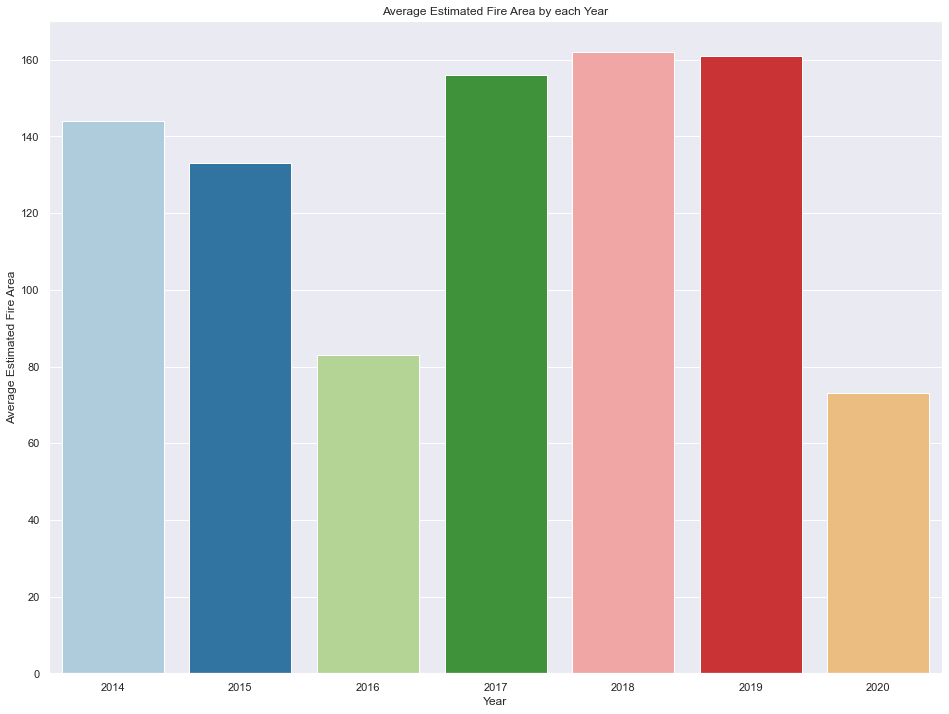

In [95]:
# Estimated Fire in Dates, Region Analysis
fire_areas = df_analysis[['Region', 'Date', 'Estimated_fire_area']].copy()
fire_areas = fire_areas.drop_duplicates().sort_values(by=['Date']).reset_index(drop=True)
fire_areas['year'] = fire_areas['Date'].dt.year
fire_areas['month'] = fire_areas['Date'].dt.month

fire_year = fire_areas.groupby('year')[['Estimated_fire_area']].mean().round().reset_index()

plt.figure(figsize=(16, 12))
colors = sns.color_palette("Paired", 7)

fig = sns.barplot(x="year", y="Estimated_fire_area", data=fire_year, palette=colors)
fig.set_title('Average Estimated Fire Area by each Year')
fig.set(xlabel='Year', ylabel='Average Estimated Fire Area')
plt.show()

<b>Region-wise Average of Estimated Fire Area by Year

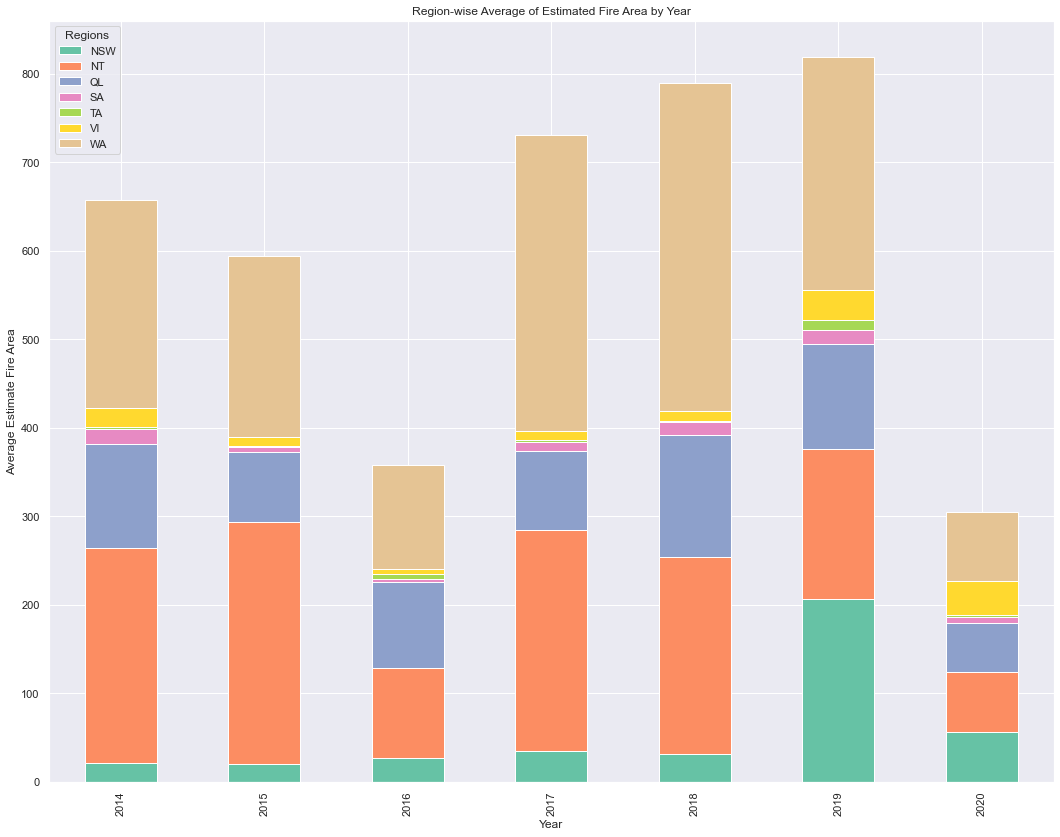

In [96]:
wide = fire_areas.pivot(index='Date', columns='Region', values='Estimated_fire_area').fillna(0).copy()
wide.reset_index(inplace=True)
wide['Year'] = wide['Date'].dt.year
wide['Month'] = wide['Date'].dt.month

temp_df = wide.groupby(['Year']).mean().round().reset_index()
temp_df.drop(['Month'], axis = 1, inplace=True)
temp_df.set_index('Year', inplace=True)

colors = sns.color_palette("Set2", 7)
temp_df.plot(kind="bar", stacked=True, figsize=(18, 14), color=colors).legend(loc='upper left', title="Regions")

plt.title("Region-wise Average of Estimated Fire Area by Year")
plt.xlabel("Year")
plt.ylabel("Average Estimate Fire Area")
plt.show()

<b>Average Estimate Fire Area by Year in different Regions

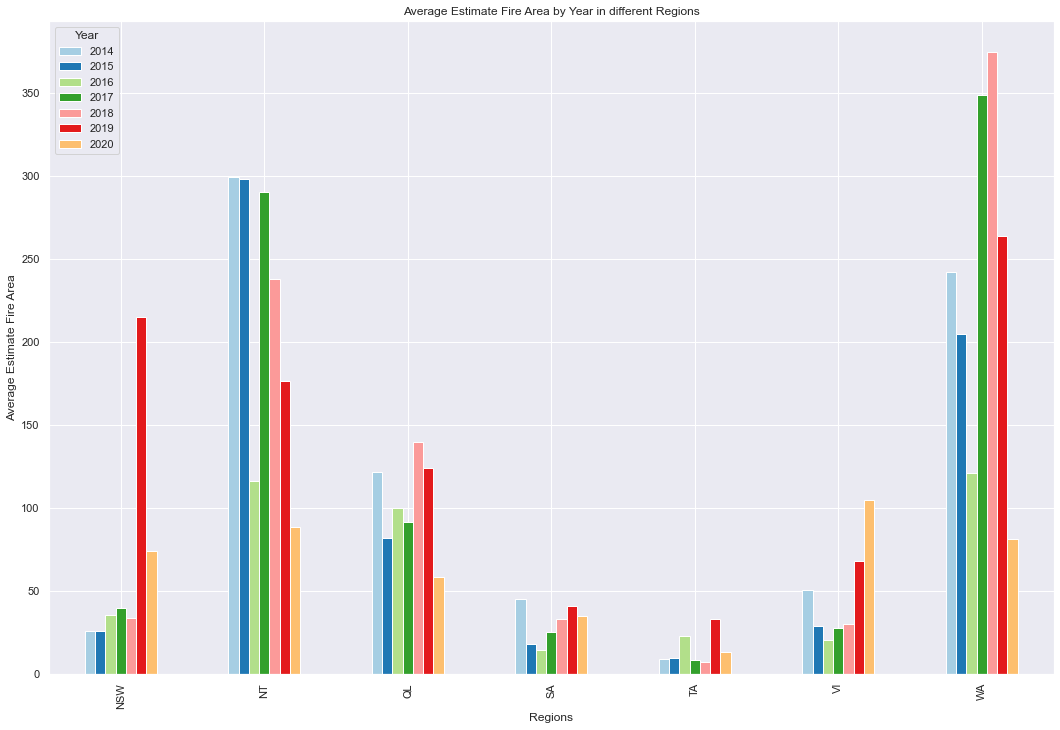

In [97]:
month_wise = fire_areas.copy()
month_wise['month'] = month_wise['Date'].dt.strftime('%Y %m')
month_wise = month_wise.sort_values(by=['Region', 'Date']).reset_index(drop=True)
month_wise = month_wise.groupby(['Region', 'year'])[['Estimated_fire_area']].mean().reset_index()
month_wise = month_wise.pivot(index='Region', columns='year', values='Estimated_fire_area').fillna(0).reset_index()
month_wise.set_index('Region', inplace=True)

# month_wise.plot(kind="bar", stacked=True, figsize=(16,14)).legend(loc='upper left', title="Regions")
colors = sns.color_palette("Paired", 7)
month_wise.plot(kind="bar", figsize=(18, 12), color=colors).legend(loc='upper left', title="Year")
plt.title("Average Estimate Fire Area by Year in different Regions")
plt.xlabel("Regions")
plt.ylabel("Average Estimate Fire Area")
plt.show()

<b>Average Estimated Fire Area each Month by Year

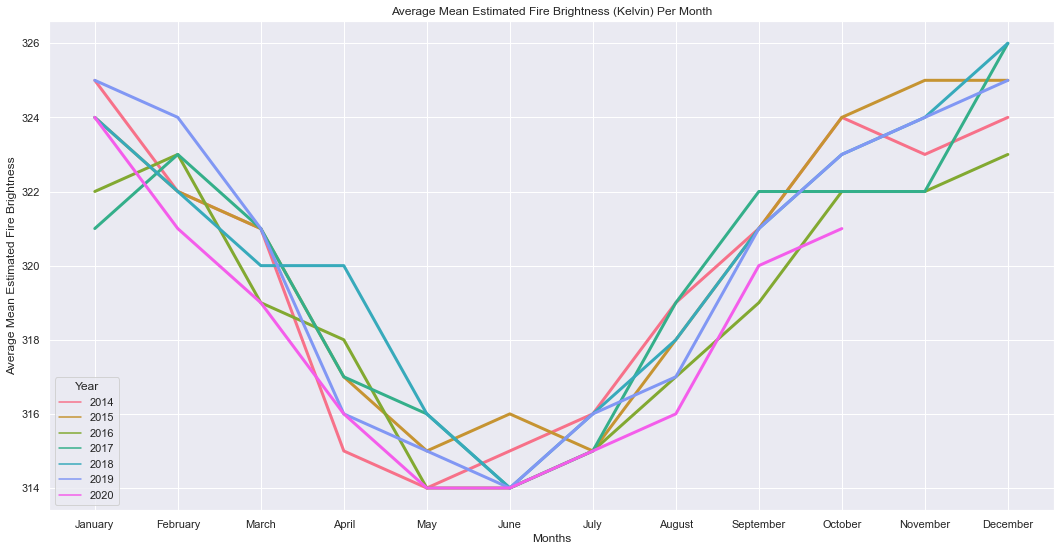

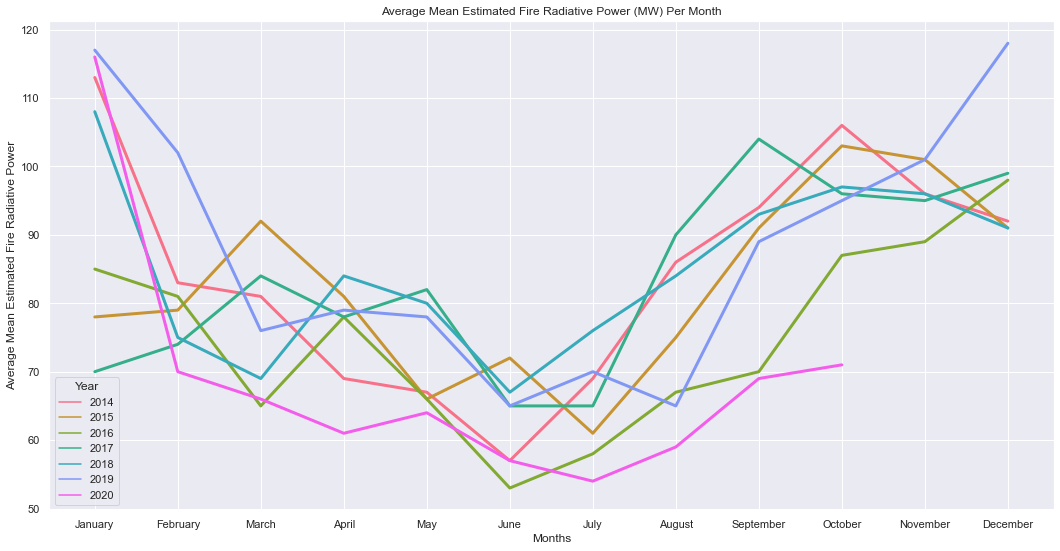

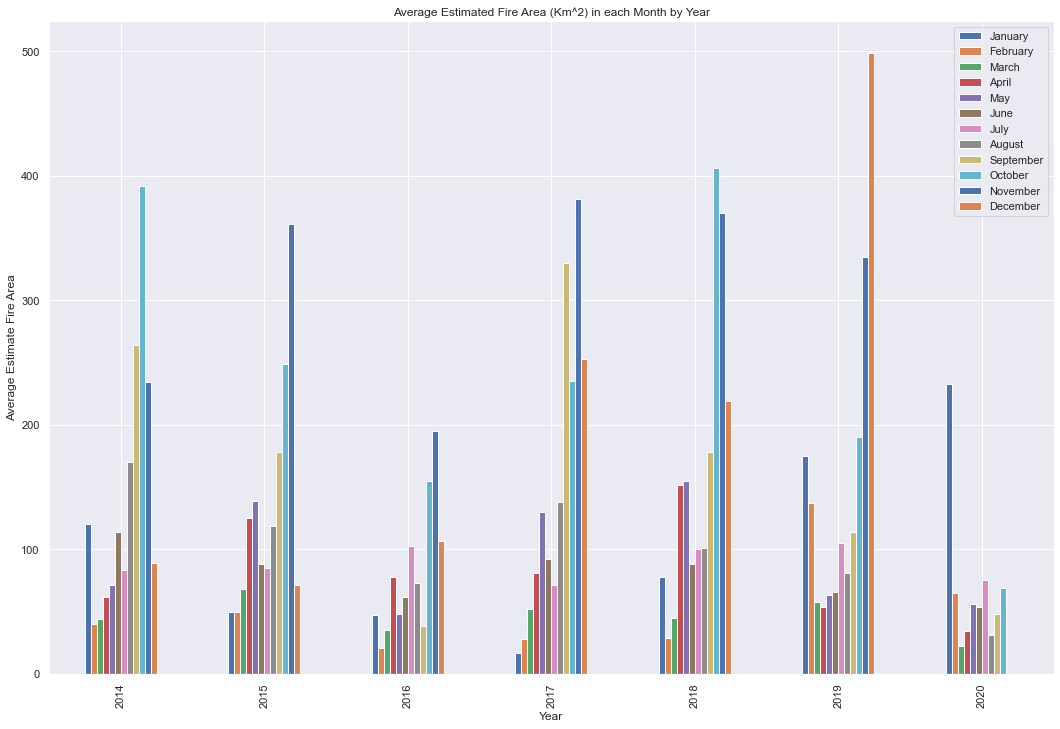

In [98]:
df_fire_bright = df_analysis[['Region', 'Date', 'Estimated_fire_area', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power']].copy()
df_fire_bright['year'] = df_fire_bright['Date'].dt.year
df_fire_bright['month'] = df_fire_bright['Date'].dt.month
df_fire_bright['month_name'] = df_fire_bright['Date'].dt.strftime('%B')

f_area = df_fire_bright.groupby(['year', 'month'])[['Estimated_fire_area']].mean().round().reset_index()
f_area_wide = f_area.pivot(index='year', columns='month', values='Estimated_fire_area').fillna(0).copy()
list_of_months = pd.to_datetime(f_area['month'], format='%m').dt.strftime('%B').unique().tolist()

# Average Mean Estimated Fire Brightness (Kelvin) Per Month
f_bright = df_fire_bright.groupby(['year', 'month', 'month_name'])[['Mean_estimated_fire_brightness']].mean().round()
f_bright = f_bright.reset_index().drop('month', axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])

plt.figure(figsize=(18, 9))
colors = sns.color_palette("husl", 7)

fig = sns.lineplot(x="month", y="Mean_estimated_fire_brightness", hue="year", data=f_bright, linewidth=3, palette=colors)
fig.set_title('Average Mean Estimated Fire Brightness (Kelvin) Per Month')
fig.set(xlabel='Months', ylabel='Average Mean Estimated Fire Brightness')
fig.legend().set_title('Year')

# Average Mean Estimated Fire Radiative Power (MW) Per Month
f_power = df_fire_bright.groupby(['year', 'month', 'month_name'], group_keys=False)[['Mean_estimated_fire_radiative_power']].mean().round()
f_power = f_power.reset_index().drop('month', axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])

plt.figure(figsize=(18, 9))
colors = sns.color_palette("husl", 7)

fig = sns.lineplot(x="month", y="Mean_estimated_fire_radiative_power", hue="year", data=f_power, linewidth=3, palette=colors)
fig.set_title('Average Mean Estimated Fire Radiative Power (MW) Per Month')
fig.set(xlabel='Months', ylabel='Average Mean Estimated Fire Radiative Power')
fig.legend().set_title('Year')


f_area_wide.plot(kind='bar', figsize=(18, 12))
plt.legend(labels=list_of_months)
plt.title("Average Estimated Fire Area (Km^2) in each Month by Year")
plt.xlabel("Year")
plt.ylabel("Average Estimate Fire Area")
plt.show()

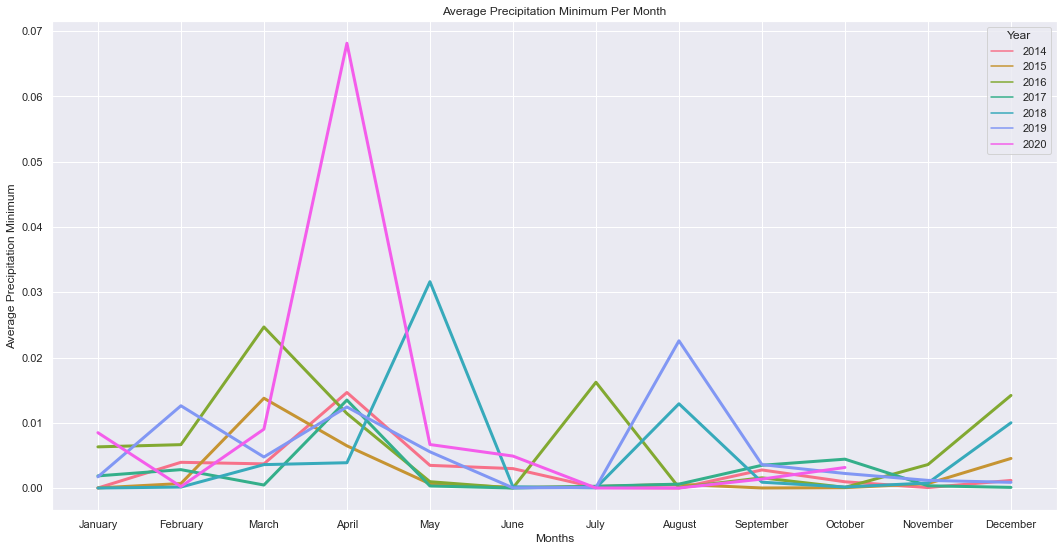

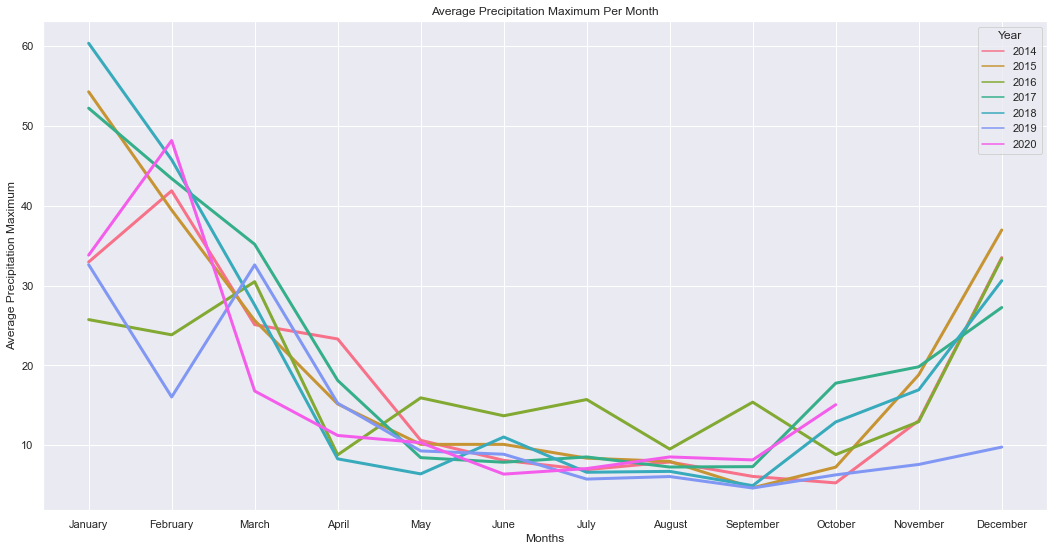

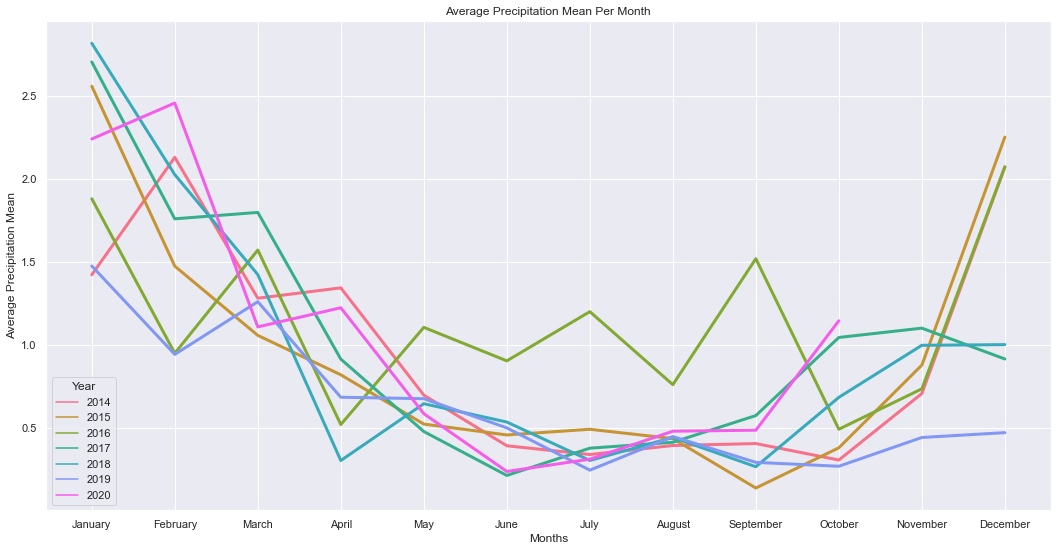

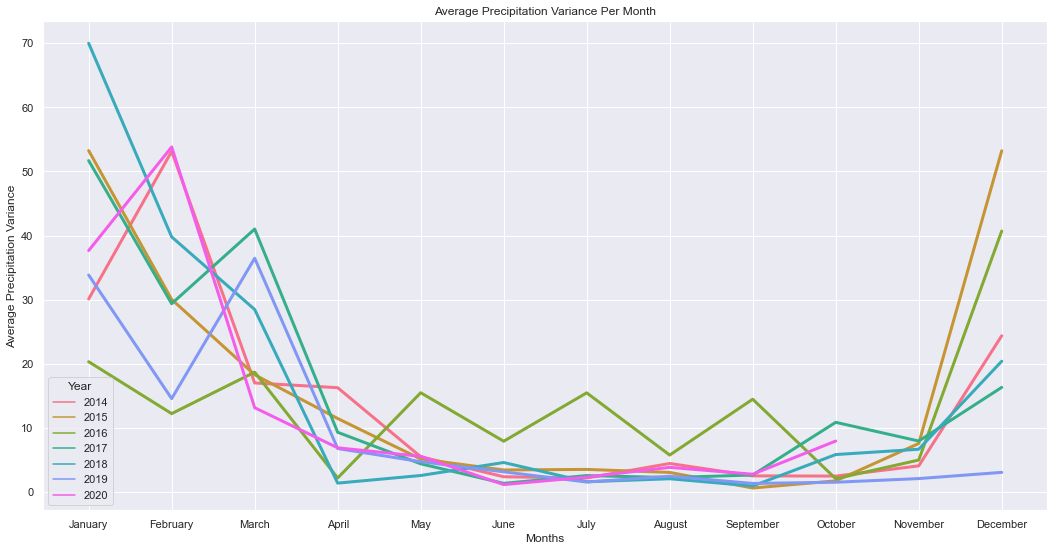

In [99]:
df_precipitation = df_analysis[['Region', 'Date' ,'Precipitation_min', 'Precipitation_max', 'Precipitation_mean', 'Precipitation_2nd_moment']].copy()
df_precipitation.drop_duplicates(inplace=True)
df_precipitation.sort_values(by=['Region', 'Date'])
df_precipitation.reset_index(drop=True, inplace=True)

df_precipitation['year'] = df_precipitation['Date'].dt.year
df_precipitation['month'] = df_precipitation['Date'].dt.month
df_precipitation['month_name'] = df_precipitation['Date'].dt.strftime('%B')

df_p = df_precipitation.groupby(['year', 'month', 'month_name']).mean()
df_p = df_p.reset_index().drop(['month'], axis=1).rename(columns={'month_name': 'month'}).set_index(['year', 'month'])
df_p.reset_index(inplace=True)

param = 'Precipitation'

num_years = df_p.year.unique().shape[0]
colors = sns.color_palette("husl", num_years)
metric_list = ['Minimum', 'Maximum', 'Mean', 'Variance']

for col_name, metric in zip(df_p.columns[2:], metric_list):
    if col_name.startswith(param):
        lab = '{} {}'.format(param, metric)
        plt.figure(figsize=(18, 9))
        fig = sns.lineplot(x="month", y=col_name, hue="year", data=df_p, linewidth=3, palette=colors)
        fig.set_title('Average {} Per Month'.format(lab))
        fig.set(xlabel='Months', ylabel='Average {}'.format(lab))
        fig.legend().set_title('Year')
        plt.show()

-------

# Correlations

### Heatmap

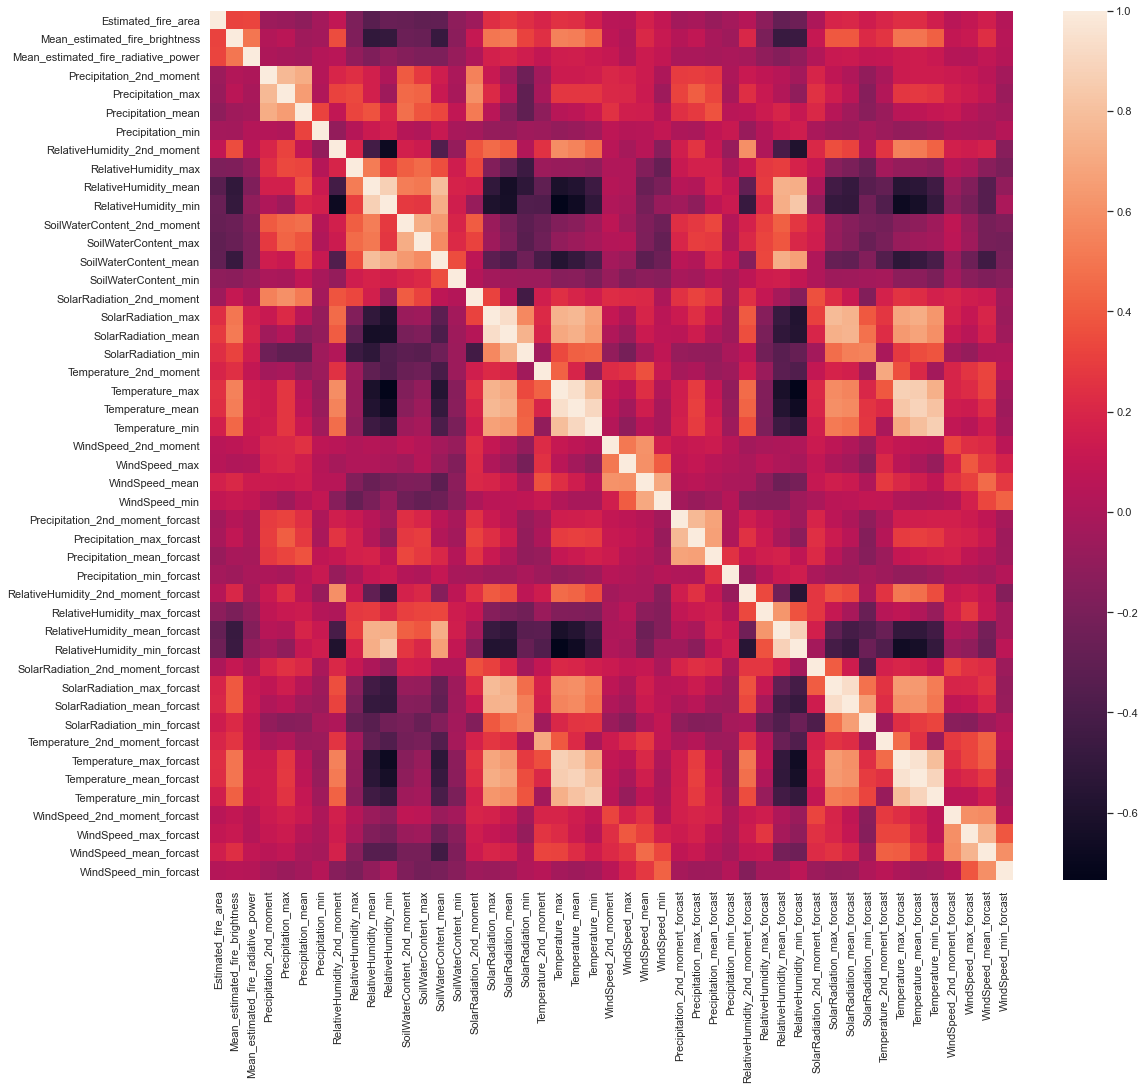

In [100]:
df_corr = df_analysis.drop(['Region', 'Date', 'Mean_confidence', 'Std_confidence', 'Var_confidence',
                            'Count', 'Replaced', 'area', 'Lead time'], axis=1).copy()
corr = df_corr.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr)
plt.show()

All <b>Weather Parameters</b> Mean Values and Forecast Mean Values are <b>highly correlated</b>.

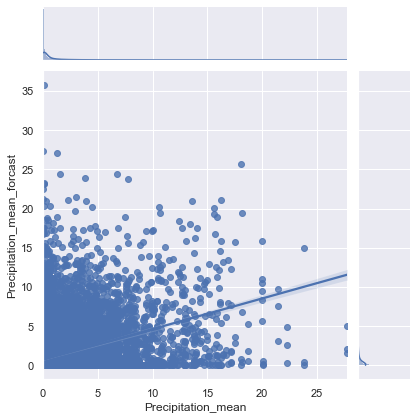

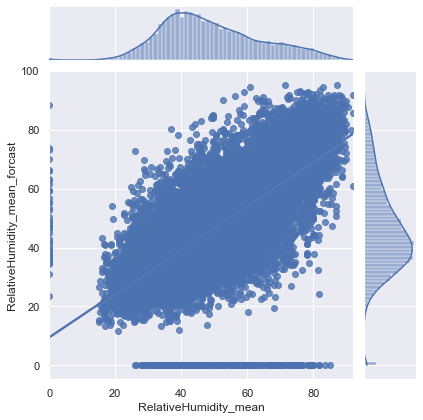

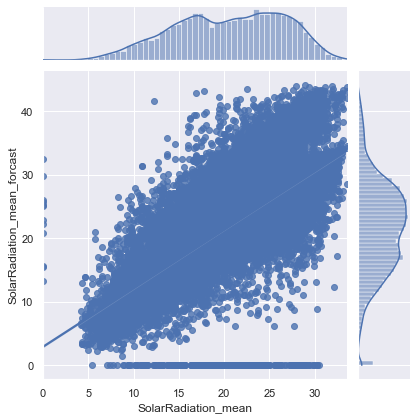

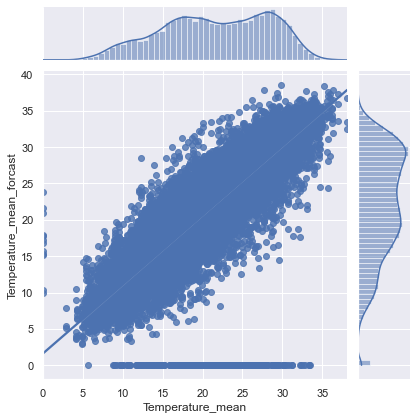

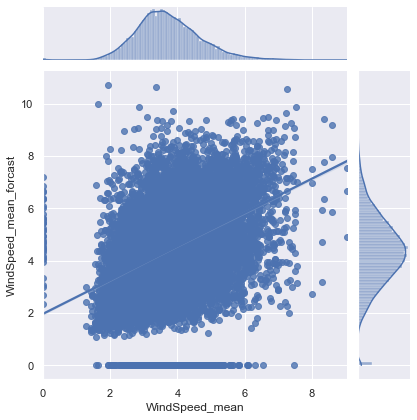

In [101]:
all_columns = df_analysis.columns.tolist()
column_list = ['Precipitation_mean', 'RelativeHumidity_mean', 'SoilWaterContent_mean',
               'SolarRadiation_mean', 'Temperature_mean', 'WindSpeed_mean']
for col in column_list:
    new_col = col + '_forcast'
    if new_col in all_columns:
        sns.jointplot(x=col, y=new_col, data=df_analysis, kind='reg')

There is increase in Humidity as it rains more.

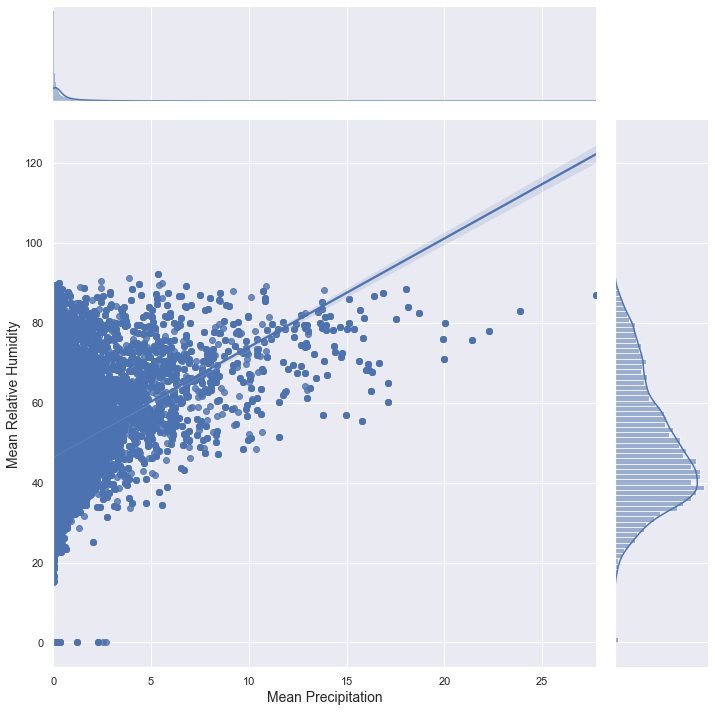

In [102]:
p = sns.jointplot(x='Precipitation_mean', y='RelativeHumidity_mean', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Mean Precipitation", "Mean Relative Humidity", fontsize=14)
plt.show()

Average Relative Humidity increases with the rise in Average Soil Water Content.

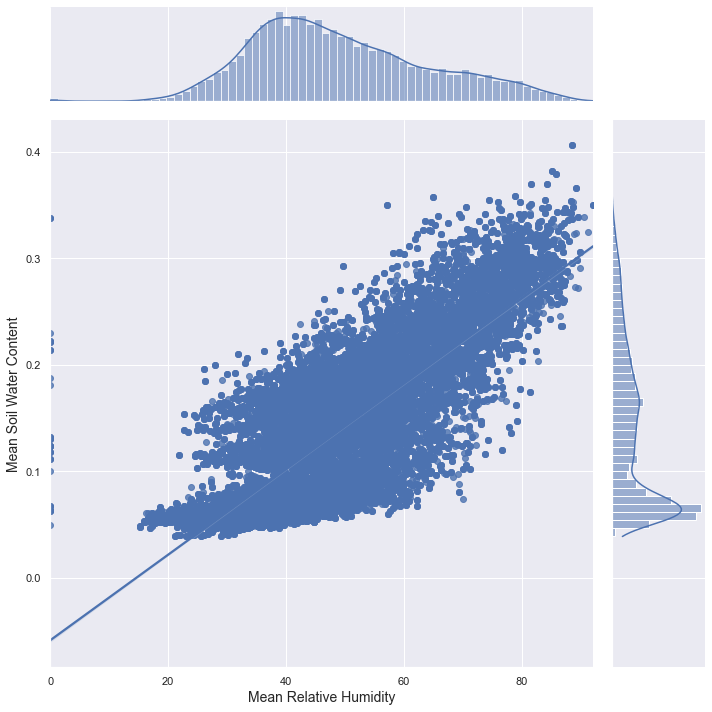

In [103]:
p = sns.jointplot(x='RelativeHumidity_mean', y='SoilWaterContent_mean', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Mean Relative Humidity", "Mean Soil Water Content", fontsize=14)
plt.show()

Average Solar Radiation starts to decrease when there is increase in average Relative Humidity.

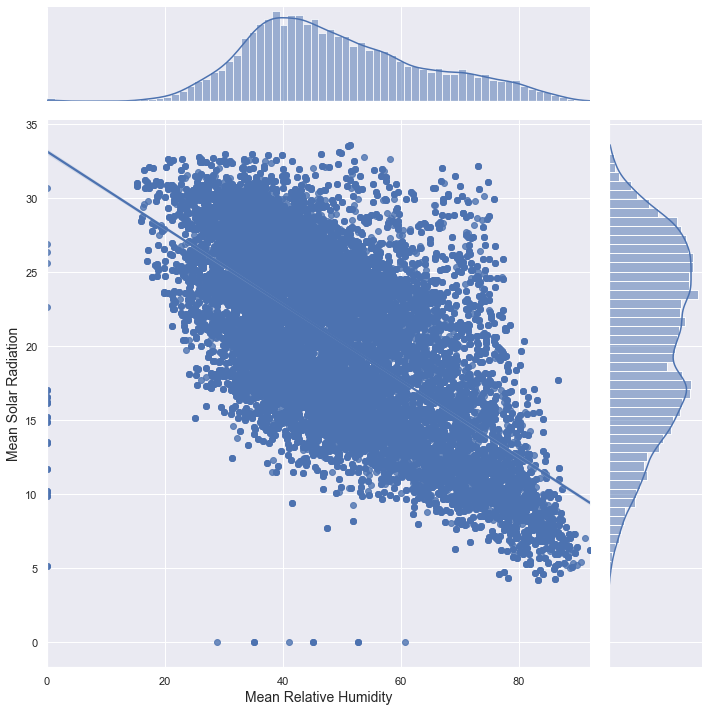

In [104]:
p = sns.jointplot(x='RelativeHumidity_mean', y='SolarRadiation_mean', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Mean Relative Humidity", "Mean Solar Radiation", fontsize=14)
plt.show()

The average Temperature is rising when average Solar Radiation increases.

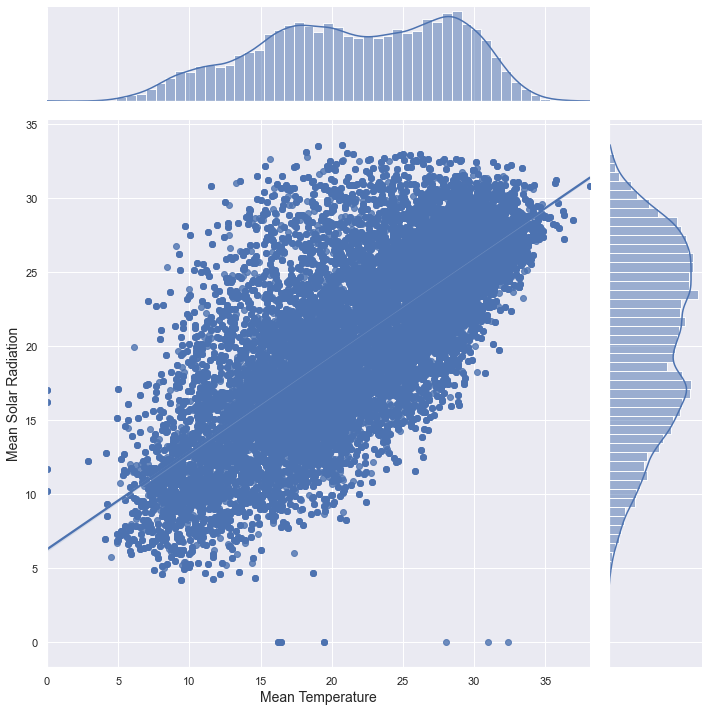

In [105]:
p = sns.jointplot(x='Temperature_mean', y='SolarRadiation_mean', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Mean Temperature", "Mean Solar Radiation", fontsize=14)
plt.show()

Average Humidity decrease when Temperature rises.

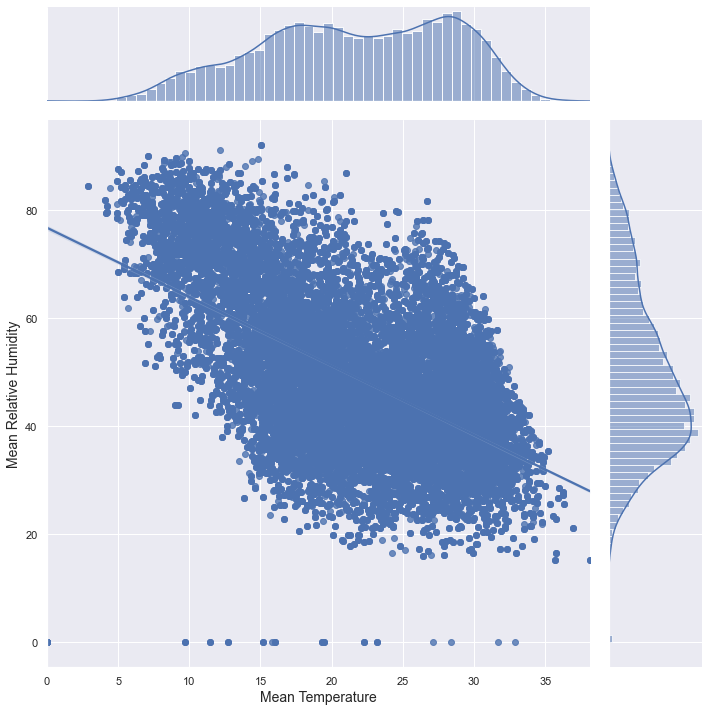

In [106]:
p = sns.jointplot(x='Temperature_mean', y='RelativeHumidity_mean', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Mean Temperature", "Mean Relative Humidity", fontsize=14)
plt.show()

An estimated Fire Area increases when forecasts for average Wind Speeds increase.

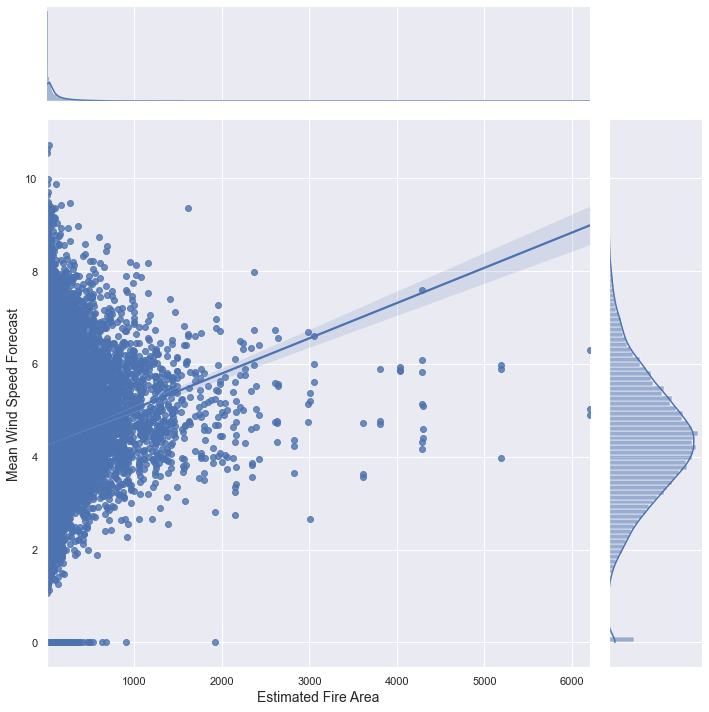

In [107]:
p = sns.jointplot(x='Estimated_fire_area', y='WindSpeed_mean_forcast', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Estimated Fire Area", "Mean Wind Speed Forecast", fontsize=14)
plt.show()

An estimated Fire Area increases when there is rise in average Temperature forecast.

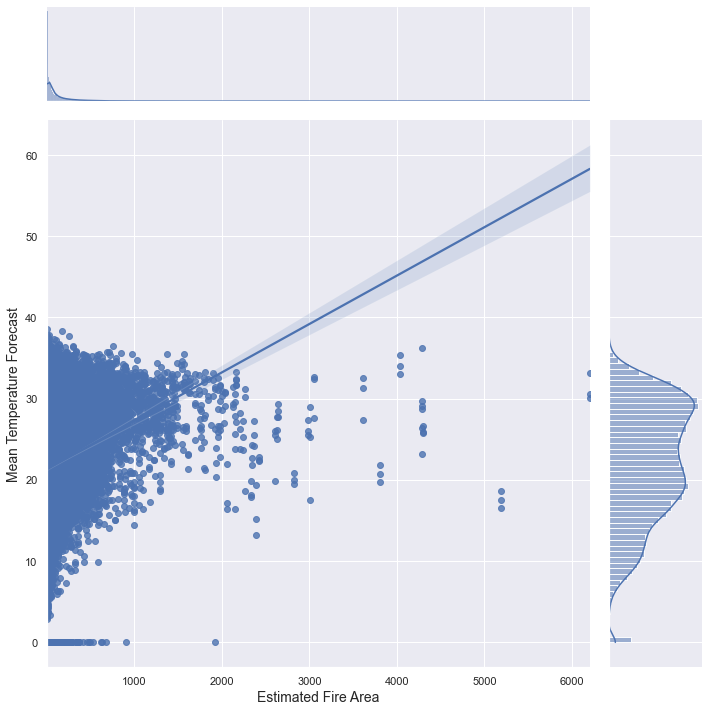

In [108]:
p = sns.jointplot(x='Estimated_fire_area', y='Temperature_mean_forcast', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Estimated Fire Area", "Mean Temperature Forecast", fontsize=14)
plt.show()

An estimated Fire Area increases when there are high forecast for average Solar Radiation.

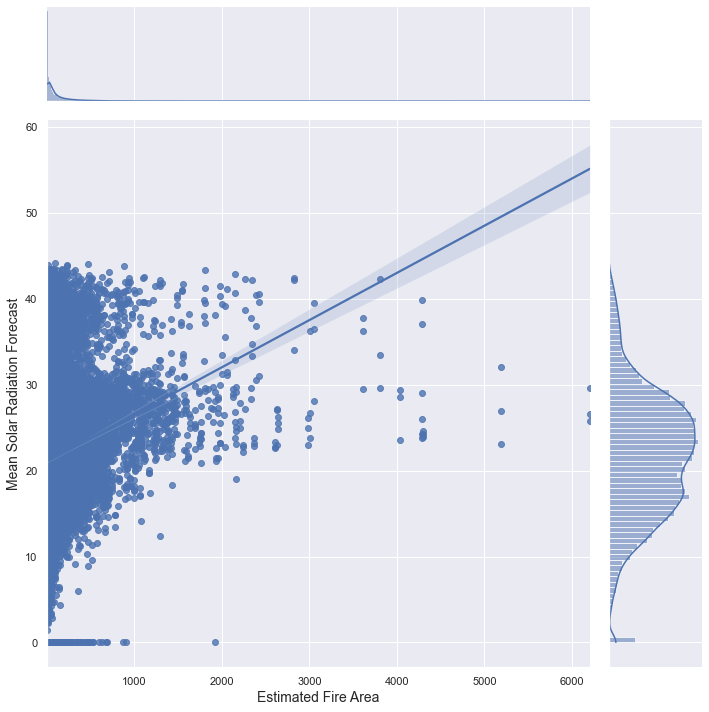

In [109]:
p = sns.jointplot(x='Estimated_fire_area', y='SolarRadiation_mean_forcast', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Estimated Fire Area", "Mean Solar Radiation Forecast", fontsize=14)
plt.show()

An estimated Fire Area increases when average Soil Water Content is decreasing.

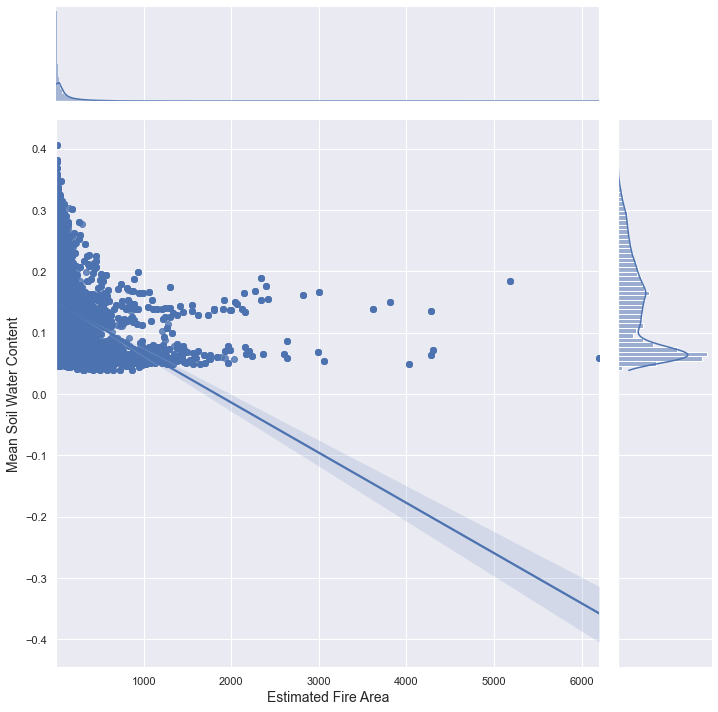

In [110]:
p = sns.jointplot(x='Estimated_fire_area', y='SoilWaterContent_mean', data=df_analysis, height=10, kind="reg")
p.set_axis_labels("Estimated Fire Area", "Mean Soil Water Content", fontsize=14)
plt.show()